# Comprehensive Exploratory Data Analysis (EDA) - Customer Churn Dataset

This notebook provides an in-depth exploratory data analysis of the customer churn dataset, covering:
- Data overview and structure
- Missing value analysis
- Univariate analysis (distributions)
- Bivariate analysis (relationships with churn)
- Multivariate analysis
- Outlier detection
- Correlation analysis
- Statistical insights

In [1]:
from pathlib import Path
import os

SRC = str(Path.cwd().parent)
os.chdir(SRC)

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, normaltest, kstest, shapiro
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Data Loading and Initial Inspection

In [3]:
# Load the dataset
df = pd.read_csv('data/raw/customer_churn_dataset_with_date.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nNumber of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

Dataset loaded successfully!
Shape: (100000, 11)

Number of samples: 100,000
Number of features: 11


In [4]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


customer_id    age  tenure_months  monthly_charges  total_charges  \
0            1 46.000          8.000           63.670        102.960   
1            2 38.000         28.000           93.660       2830.150   
2            3 48.000          5.000          122.370        924.360   
3            4 58.000         37.000           66.450       1990.950   
4            5 37.000          2.000           57.320         20.030   
5            6    NaN         42.000           67.930       2958.070   
6            7 59.000         20.000           40.250        812.710   
7            8 49.000          0.000           38.330       -108.890   
8            9 34.000          7.000           56.680        668.270   
9           10    NaN         16.000              NaN       1357.830   

    contract_type internet_service  support_calls  late_payments  churn  \
0  Month-to-month      Fiber optic          3.000              0      0   
1        One year      Fiber optic          0.000              1      1   
2  Month-to-month              DSL          1.000              0      0   
3        One year      Fiber optic          5.000              2      0   
4        One year      Fiber optic          0.000              1      1   
5        Two year              DSL          2.000              1      0   
6  Month-to-month      Fiber optic          0.000              0      1   
7  Month-to-month      Fiber optic          1.000              0      1   
8        Two year              DSL          3.000              1      0   
9  Month-to-month               No          0.000              0      0   

         Date  
0  2025-01-01  
1  2025-01-02  
2  2025-01-03  
3  2025-01-04  
4  2025-01-05  
5  2025-01-06  
6  2025-01-07  
7  2025-01-08  
8  2025-01-09  
9  2025-01-10

In [5]:
# Display last few rows
print("Last 10 rows of the dataset:")
df.tail(10)

Last 10 rows of the dataset:


customer_id    age  tenure_months  monthly_charges  total_charges  \
99990        99991 48.000         65.000           46.860       3009.580   
99991        99992 50.000         34.000          100.590       3429.490   
99992        99993 37.000         37.000          115.380       4629.560   
99993        99994 43.000         10.000           76.680       1094.330   
99994        99995 56.000         16.000           89.620       1217.050   
99995        99996 37.000          1.000           88.580         68.160   
99996        99997 33.000         24.000           33.470        661.760   
99997        99998 45.000         30.000           73.830       1988.940   
99998        99999 37.000         21.000           43.290        806.170   
99999       100000 41.000         46.000           79.100       3874.540   

        contract_type internet_service  support_calls  late_payments  churn  \
99990        One year              DSL          0.000              0      0   
99991  Month-to-month      Fiber optic          2.000              0      0   
99992        Two year      Fiber optic          3.000              0      1   
99993        One year      Fiber optic          3.000              3      0   
99994  Month-to-month      Fiber optic          1.000              0      1   
99995  Month-to-month      Fiber optic          1.000              0      1   
99996        One year              DSL          4.000              1      0   
99997  Month-to-month      Fiber optic          1.000              0      1   
99998        Two year              DSL          0.000              1      0   
99999  Month-to-month      Fiber optic          0.000              0      1   

             Date  
99990  2025-12-12  
99991  2025-12-13  
99992  2025-12-14  
99993  2025-12-15  
99994  2025-12-16  
99995  2025-12-17  
99996  2025-12-18  
99997  2025-12-19  
99998  2025-12-20  
99999  2025-12-21

In [6]:
# Random sample
print("Random sample of 10 rows:")
df.sample(10, random_state=42)

Random sample of 10 rows:


customer_id    age  tenure_months  monthly_charges  total_charges  \
75721        75722 44.000         27.000           52.360       1507.680   
80184        80185 64.000         24.000           30.770        781.890   
19864        19865 55.000          1.000           74.300        131.640   
76699        76700 18.000         15.000           38.290        623.300   
92991        92992 44.000          6.000          103.860        538.650   
76434        76435 51.000         31.000          149.800       4283.200   
84004        84005 31.000          1.000           72.550          7.810   
80917        80918 20.000         20.000          101.300            NaN   
60767        60768 44.000         16.000           89.270       1354.960   
50074        50075 25.000          5.000           53.790        122.390   

        contract_type internet_service  support_calls  late_payments  churn  \
75721        Two year      Fiber optic          1.000              0      0   
80184  Month-to-month      Fiber optic          5.000              1      1   
19864  Month-to-month      Fiber optic          2.000              1      0   
76699  Month-to-month      Fiber optic          0.000              1      0   
92991        Two year      Fiber optic          0.000              0      1   
76434  Month-to-month              DSL          2.000              2      0   
84004        One year              DSL          2.000              0      1   
80917  Month-to-month              DSL          1.000              3      0   
60767  Month-to-month               No          2.000              0      1   
50074        One year      Fiber optic            NaN              0      1   

             Date  
75721  2025-06-16  
80184  2025-09-07  
19864  2025-06-04  
76699  2025-02-19  
92991  2025-10-09  
76434  2025-05-30  
84004  2025-02-24  
80917  2025-09-10  
60767  2025-06-27  
50074  2025-03-11

In [7]:
# Data types and non-null counts
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       100000 non-null  int64  
 1   age               97000 non-null   float64
 2   tenure_months     100000 non-null  float64
 3   monthly_charges   97000 non-null   float64
 4   total_charges     97000 non-null   float64
 5   contract_type     100000 non-null  object 
 6   internet_service  100000 non-null  object 
 7   support_calls     97000 non-null   float64
 8   late_payments     100000 non-null  int64  
 9   churn             100000 non-null  int64  
 10  Date              100000 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [8]:
# Data types summary
print("\nData Types Summary:")
print(df.dtypes.value_counts())
print("\nDetailed breakdown:")
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype}: {len(cols)} columns")
    print(f"  {cols}")


Data Types Summary:
float64    5
int64      3
object     3
Name: count, dtype: int64

Detailed breakdown:

int64: 3 columns
  ['customer_id', 'late_payments', 'churn']

float64: 5 columns
  ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'support_calls']

object: 3 columns
  ['contract_type', 'internet_service', 'Date']


In [9]:
# Statistical summary for numerical features
print("Statistical Summary - Numerical Features:")
df.describe(include=[np.number]).T

Statistical Summary - Numerical Features:


count      mean       std       min       25%       50%  \
customer_id     100000.000 50000.500 28867.658     1.000 25000.750 50000.500   
age              97000.000    40.160    11.665    18.000    32.000    40.000   
tenure_months   100000.000    23.998    23.317     0.000     7.000    17.000   
monthly_charges  97000.000    73.377    47.536    10.000    49.920    70.280   
total_charges    97000.000  1730.214  2104.812 -2450.750   411.793  1055.735   
support_calls    97000.000     1.503     1.226     0.000     1.000     1.000   
late_payments   100000.000     0.804     0.898     0.000     0.000     1.000   
churn           100000.000     0.393     0.488     0.000     0.000     0.000   

                      75%        max  
customer_id     75000.250 100000.000  
age                48.000     85.000  
tenure_months      33.000    120.000  
monthly_charges    90.890   1140.670  
total_charges    2310.012  54770.410  
support_calls       2.000     10.000  
late_payments       1.000      8.000  
churn               1.000      1.000

In [10]:
# Statistical summary for categorical features
print("Statistical Summary - Categorical Features:")
df.describe(include=['object']).T

Statistical Summary - Categorical Features:


count unique             top   freq
contract_type     100000      3  Month-to-month  60019
internet_service  100000      3     Fiber optic  50245
Date              100000    365      2025-01-01    274

In [11]:
# Memory usage
print("Memory Usage:")
memory_usage = df.memory_usage(deep=True)
print(memory_usage)
print(f"\nTotal memory usage: {memory_usage.sum() / 1024**2:.2f} MB")

Memory Usage:
Index                   132
customer_id          800000
age                  800000
tenure_months        800000
monthly_charges      800000
total_charges        800000
contract_type       6860114
internet_service    6391929
support_calls        800000
late_payments        800000
churn                800000
Date                6700000
dtype: int64

Total memory usage: 25.13 MB


## 2. Missing Values Analysis

In [12]:
# Missing values count and percentage
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
                          Column  Missing_Count  Missing_Percentage Data_Type
age                          age           3000               3.000   float64
monthly_charges  monthly_charges           3000               3.000   float64
total_charges      total_charges           3000               3.000   float64
support_calls      support_calls           3000               3.000   float64


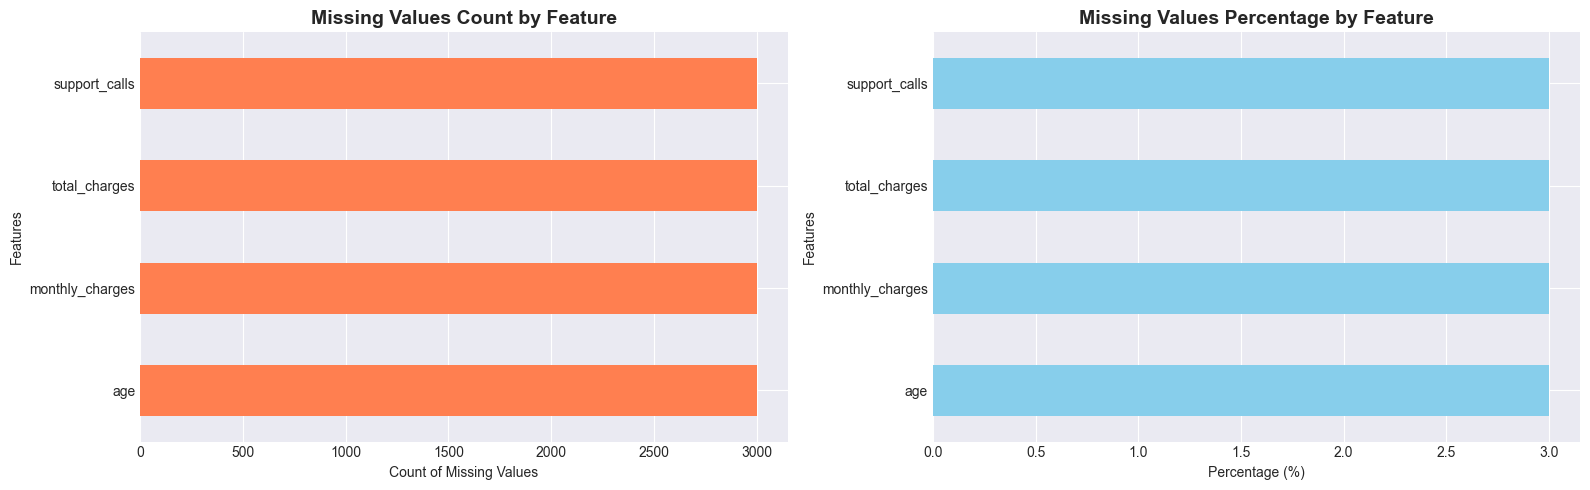

In [13]:
# Visualize missing values
if len(missing_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Bar plot of missing values
    missing_df.sort_values('Missing_Count', ascending=True).plot(
        kind='barh', x='Column', y='Missing_Count', ax=axes[0], color='coral', legend=False
    )
    axes[0].set_title('Missing Values Count by Feature', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Count of Missing Values')
    axes[0].set_ylabel('Features')
    
    # Percentage plot
    missing_df.sort_values('Missing_Percentage', ascending=True).plot(
        kind='barh', x='Column', y='Missing_Percentage', ax=axes[1], color='skyblue', legend=False
    )
    axes[1].set_title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Percentage (%)')
    axes[1].set_ylabel('Features')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

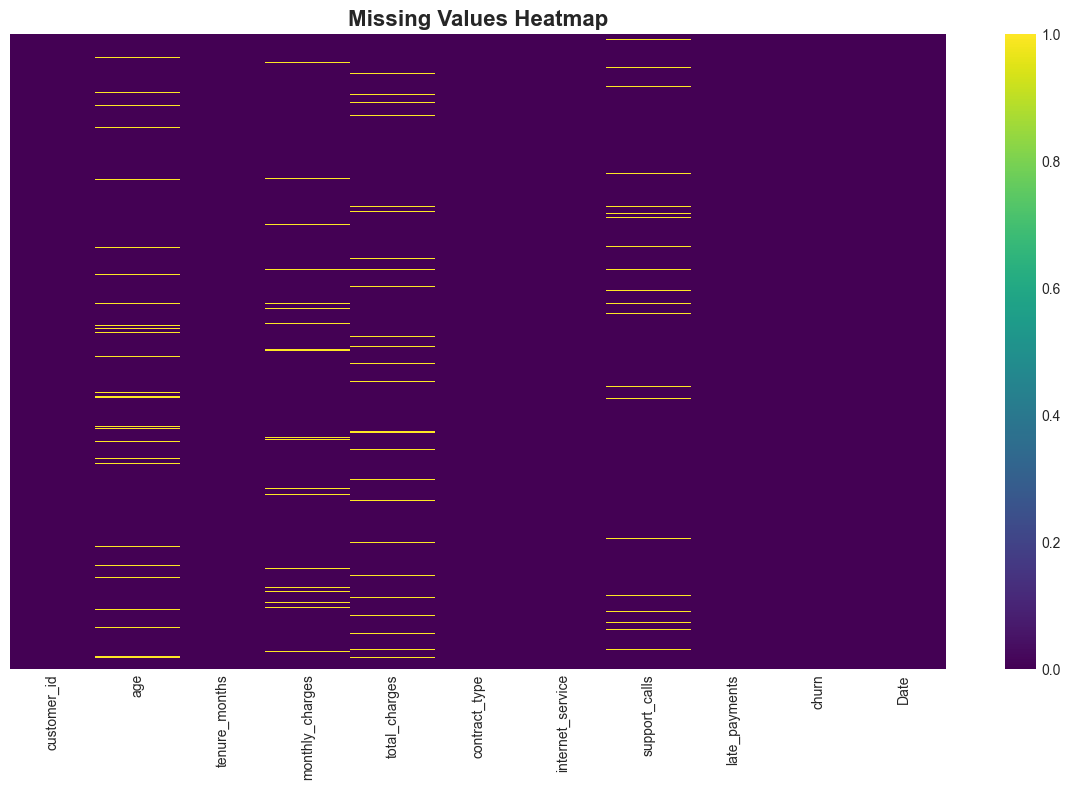

In [14]:
# Missing value heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
# Missing value patterns
print("Missing Value Patterns:")
print(f"Total rows with at least one missing value: {df.isnull().any(axis=1).sum():,}")
print(f"Percentage: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")
print(f"\nRows with all values present: {(~df.isnull().any(axis=1)).sum():,}")
print(f"Percentage: {((~df.isnull().any(axis=1)).sum() / len(df)) * 100:.2f}%")

Missing Value Patterns:
Total rows with at least one missing value: 11,474
Percentage: 11.47%

Rows with all values present: 88,526
Percentage: 88.53%


## 3. Churn Rate Analysis

In [16]:
# Churn distribution
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_pct
})
print(churn_summary)

print(f"\nChurn Rate: {churn_pct[1]:.2f}%")
print(f"Retention Rate: {churn_pct[0]:.2f}%")
print(f"\nClass Imbalance Ratio: 1:{churn_counts[0]/churn_counts[1]:.2f}")

Churn Distribution:
       Count  Percentage
churn                   
0      60748      60.748
1      39252      39.252

Churn Rate: 39.25%
Retention Rate: 60.75%

Class Imbalance Ratio: 1:1.55


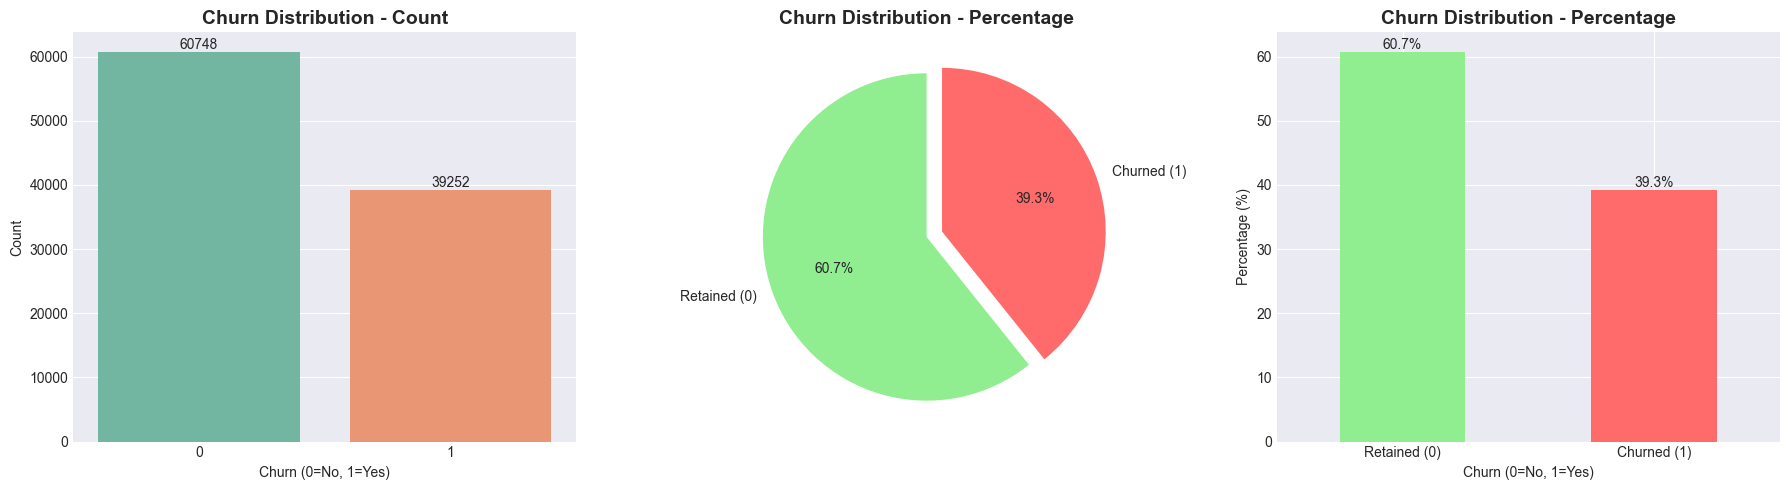

In [17]:
# Visualize churn distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
sns.countplot(data=df, x='churn', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#90EE90', '#FF6B6B']
axes[1].pie(churn_counts, labels=['Retained (0)', 'Churned (1)'], autopct='%1.1f%%', 
            startangle=90, colors=colors, explode=(0, 0.1))
axes[1].set_title('Churn Distribution - Percentage', fontsize=14, fontweight='bold')

# Percentage bar plot
churn_pct.plot(kind='bar', ax=axes[2], color=['#90EE90', '#FF6B6B'])
axes[2].set_title('Churn Distribution - Percentage', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Churn (0=No, 1=Yes)')
axes[2].set_ylabel('Percentage (%)')
axes[2].set_xticklabels(['Retained (0)', 'Churned (1)'], rotation=0)
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

## 4. Univariate Analysis - Numerical Features

In [18]:
# Identify numerical columns (excluding customer_id and churn)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['customer_id', 'churn']]

print(f"Numerical features: {numerical_cols}")
print(f"Total: {len(numerical_cols)} features")

Numerical features: ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'support_calls', 'late_payments']
Total: 6 features


In [19]:
# Detailed statistics for each numerical feature
print("Detailed Statistics for Numerical Features:\n")
for col in numerical_cols:
    print(f"\n{'='*60}")
    print(f"Feature: {col.upper()}")
    print(f"{'='*60}")
    
    # Remove missing values for analysis
    data = df[col].dropna()
    
    print(f"Count: {len(data):,}")
    print(f"Missing: {df[col].isnull().sum():,}")
    print(f"\nCentral Tendency:")
    print(f"  Mean: {data.mean():.3f}")
    print(f"  Median: {data.median():.3f}")
    print(f"  Mode: {data.mode().values[0] if len(data.mode()) > 0 else 'N/A'}")
    
    print(f"\nDispersion:")
    print(f"  Std Dev: {data.std():.3f}")
    print(f"  Variance: {data.var():.3f}")
    print(f"  Range: {data.max() - data.min():.3f}")
    print(f"  IQR: {data.quantile(0.75) - data.quantile(0.25):.3f}")
    print(f"  Coefficient of Variation: {(data.std() / data.mean() * 100):.2f}%")
    
    print(f"\nShape:")
    print(f"  Skewness: {data.skew():.3f}")
    print(f"  Kurtosis: {data.kurtosis():.3f}")
    
    print(f"\nQuantiles:")
    print(f"  Min: {data.min():.3f}")
    print(f"  Q1 (25%): {data.quantile(0.25):.3f}")
    print(f"  Q2 (50%): {data.quantile(0.50):.3f}")
    print(f"  Q3 (75%): {data.quantile(0.75):.3f}")
    print(f"  Max: {data.max():.3f}")

Detailed Statistics for Numerical Features:


Feature: AGE
Count: 97,000
Missing: 3,000

Central Tendency:
  Mean: 40.160
  Median: 40.000
  Mode: 18.0

Dispersion:
  Std Dev: 11.665
  Variance: 136.080
  Range: 67.000
  IQR: 16.000
  Coefficient of Variation: 29.05%

Shape:
  Skewness: 0.168
  Kurtosis: -0.314

Quantiles:
  Min: 18.000
  Q1 (25%): 32.000
  Q2 (50%): 40.000
  Q3 (75%): 48.000
  Max: 85.000

Feature: TENURE_MONTHS
Count: 100,000
Missing: 0

Central Tendency:
  Mean: 23.998
  Median: 17.000
  Mode: 2.0

Dispersion:
  Std Dev: 23.317
  Variance: 543.698
  Range: 120.000
  IQR: 26.000
  Coefficient of Variation: 97.16%

Shape:
  Skewness: 1.651
  Kurtosis: 2.945

Quantiles:
  Min: 0.000
  Q1 (25%): 7.000
  Q2 (50%): 17.000
  Q3 (75%): 33.000
  Max: 120.000

Feature: MONTHLY_CHARGES
Count: 97,000
Missing: 3,000

Central Tendency:
  Mean: 73.377
  Median: 70.280
  Mode: 10.0

Dispersion:
  Std Dev: 47.536
  Variance: 2259.685
  Range: 1130.670
  IQR: 40.970
  Coefficient of 

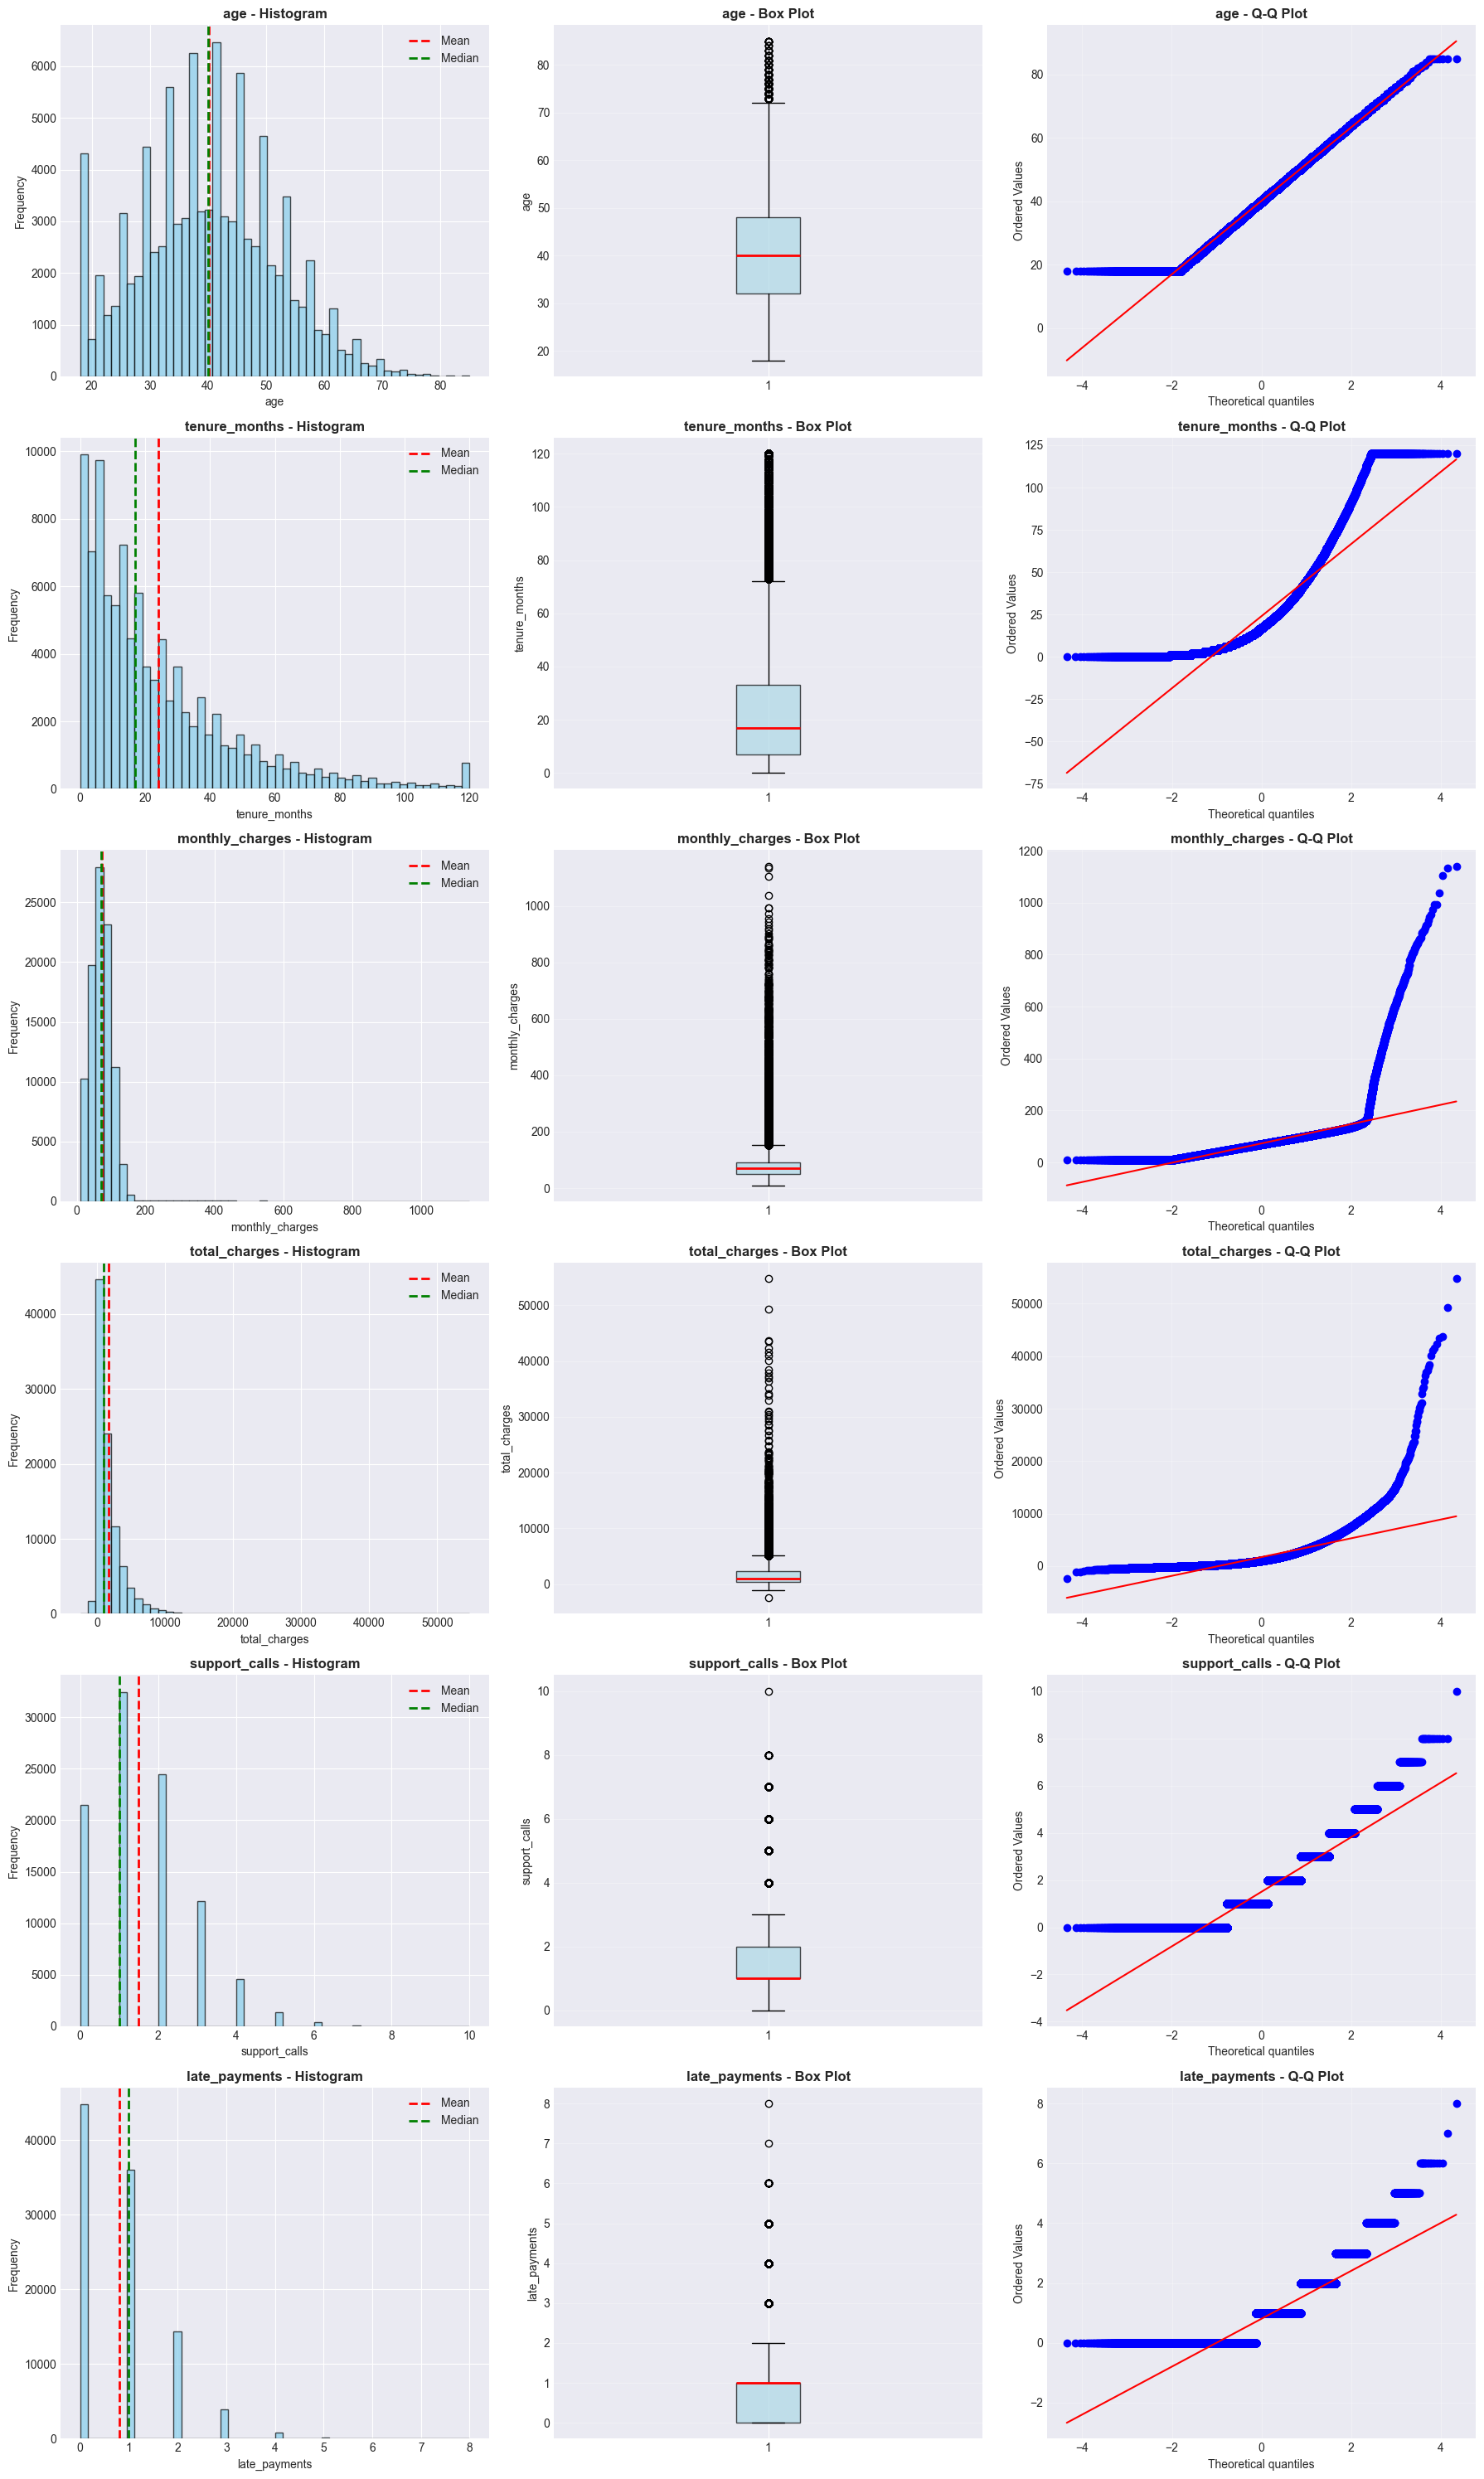

In [20]:
# Distribution plots for numerical features
fig, axes = plt.subplots(len(numerical_cols), 3, figsize=(18, 5*len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    # Histogram with KDE
    axes[idx, 0].hist(data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx, 0].set_title(f'{col} - Histogram', fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx, 0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[idx, 0].legend()
    
    # Box plot
    axes[idx, 1].boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
    axes[idx, 1].set_title(f'{col} - Box Plot', fontweight='bold')
    axes[idx, 1].set_ylabel(col)
    axes[idx, 1].grid(axis='y', alpha=0.3)
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[idx, 2])
    axes[idx, 2].set_title(f'{col} - Q-Q Plot', fontweight='bold')
    axes[idx, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

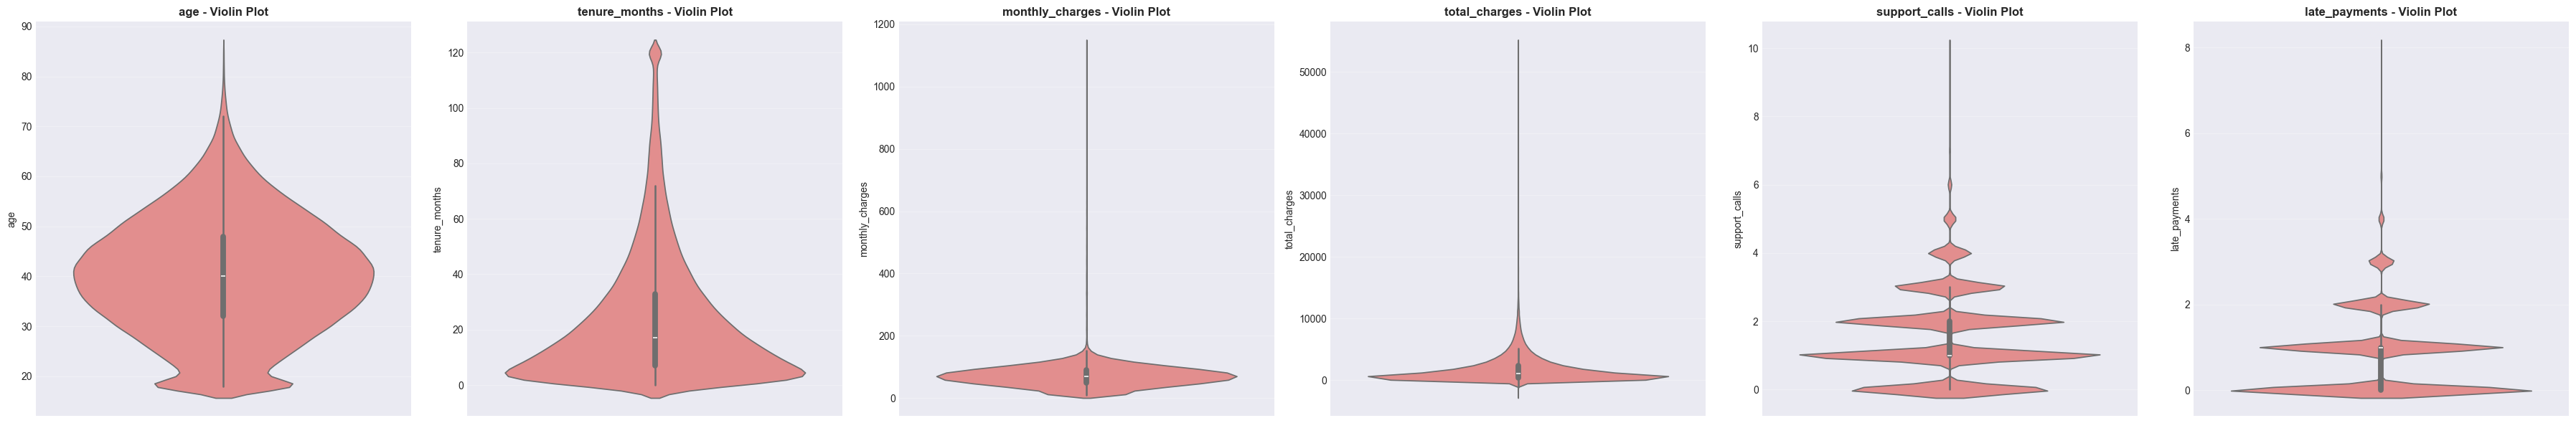

In [21]:
# Violin plots for numerical features
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(6*len(numerical_cols), 6))

if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    sns.violinplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col} - Violin Plot', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Univariate Analysis - Categorical Features

In [22]:
# Identify categorical columns (excluding Date and customer_id)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Date', 'customer_id']]

print(f"Categorical features: {categorical_cols}")
print(f"Total: {len(categorical_cols)} features")

Categorical features: ['contract_type', 'internet_service']
Total: 2 features


In [23]:
# Detailed analysis of categorical features
print("Detailed Analysis of Categorical Features:\n")
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Feature: {col.upper()}")
    print(f"{'='*60}")
    
    value_counts = df[col].value_counts()
    value_pct = df[col].value_counts(normalize=True) * 100
    
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_pct
    })
    
    print(f"\nUnique values: {df[col].nunique()}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"\nValue Distribution:")
    print(summary)
    print(f"\nMode: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")

Detailed Analysis of Categorical Features:


Feature: CONTRACT_TYPE

Unique values: 3
Missing values: 0

Value Distribution:
                Count  Percentage
contract_type                    
Month-to-month  60019      60.019
One year        25065      25.065
Two year        14916      14.916

Mode: Month-to-month

Feature: INTERNET_SERVICE

Unique values: 3
Missing values: 0

Value Distribution:
                  Count  Percentage
internet_service                   
Fiber optic       50245      50.245
DSL               39724      39.724
No                10031      10.031

Mode: Fiber optic


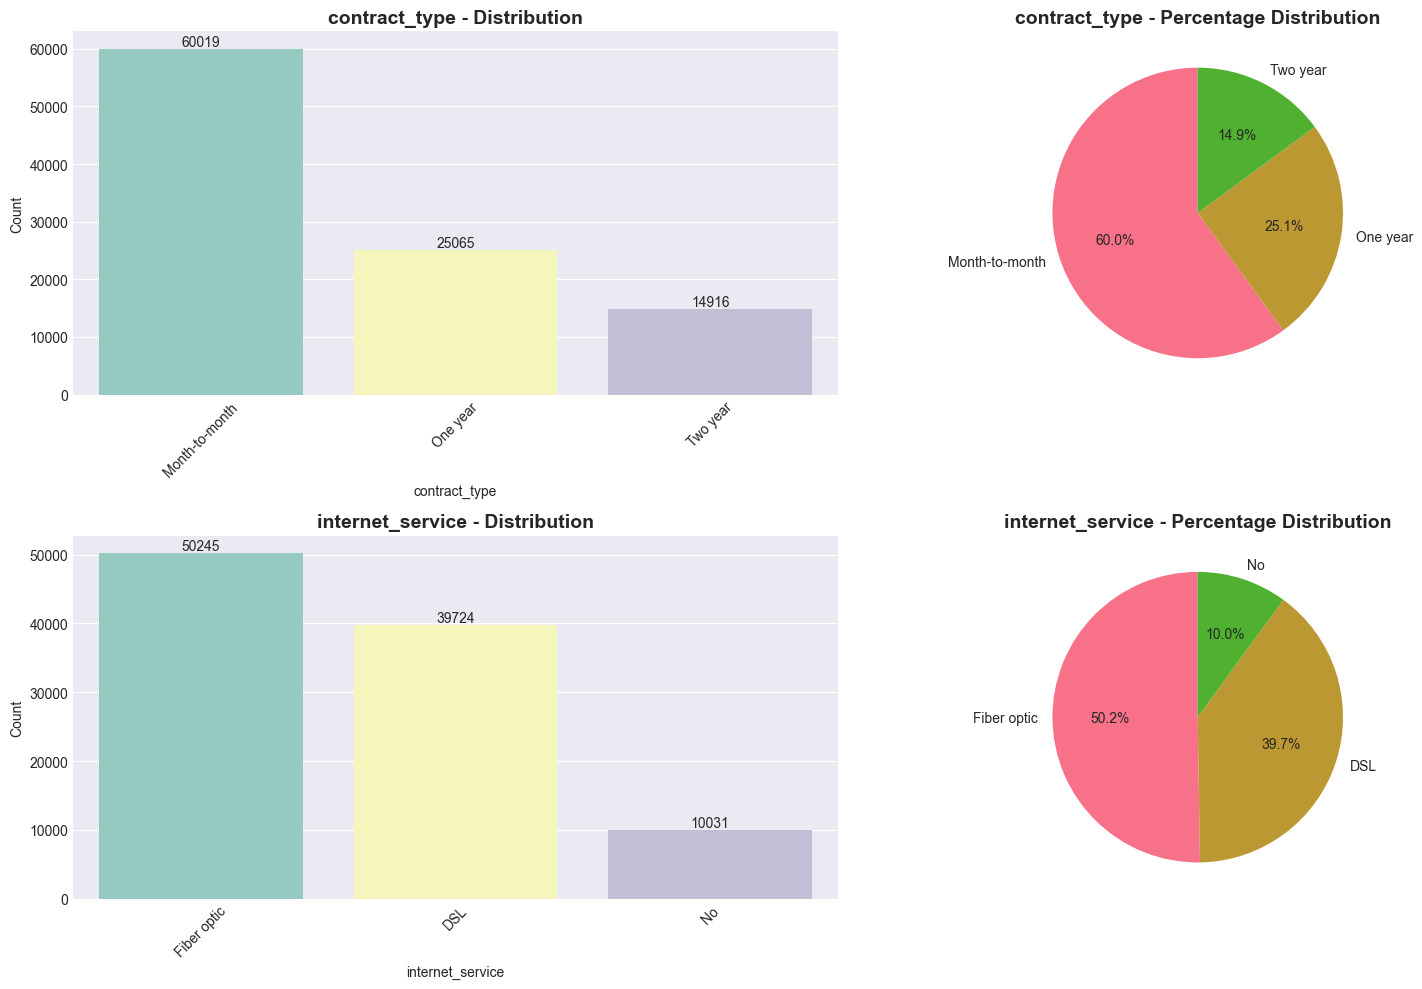

In [24]:
# Visualize categorical features
fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(categorical_cols):
    # Count plot
    value_counts = df[col].value_counts()
    sns.countplot(data=df, x=col, ax=axes[idx, 0], palette='Set3', order=value_counts.index)
    axes[idx, 0].set_title(f'{col} - Distribution', fontsize=14, fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    for container in axes[idx, 0].containers:
        axes[idx, 0].bar_label(container)
    
    # Pie chart
    axes[idx, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[idx, 1].set_title(f'{col} - Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Bivariate Analysis - Numerical Features vs Churn

In [25]:
# Statistical comparison between churned and retained customers
print("Numerical Features Comparison: Churned vs Retained Customers\n")
print("="*80)

for col in numerical_cols:
    print(f"\nFeature: {col.upper()}")
    print("-"*80)
    
    churned = df[df['churn'] == 1][col].dropna()
    retained = df[df['churn'] == 0][col].dropna()
    
    print(f"\nRetained Customers (n={len(retained)}):")
    print(f"  Mean: {retained.mean():.3f}")
    print(f"  Median: {retained.median():.3f}")
    print(f"  Std: {retained.std():.3f}")
    
    print(f"\nChurned Customers (n={len(churned)}):")
    print(f"  Mean: {churned.mean():.3f}")
    print(f"  Median: {churned.median():.3f}")
    print(f"  Std: {churned.std():.3f}")
    
    print(f"\nDifference:")
    print(f"  Mean Difference: {churned.mean() - retained.mean():.3f}")
    print(f"  Percentage Change: {((churned.mean() - retained.mean()) / retained.mean() * 100):.2f}%")
    
    # Mann-Whitney U test (non-parametric)
    statistic, p_value = stats.mannwhitneyu(retained, churned, alternative='two-sided')
    print(f"\nMann-Whitney U Test:")
    print(f"  Test Statistic: {statistic:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

Numerical Features Comparison: Churned vs Retained Customers


Feature: AGE
--------------------------------------------------------------------------------

Retained Customers (n=58918):
  Mean: 40.152
  Median: 40.000
  Std: 11.656

Churned Customers (n=38082):
  Mean: 40.173
  Median: 40.000
  Std: 11.680

Difference:
  Mean Difference: 0.021
  Percentage Change: 0.05%

Mann-Whitney U Test:
  Test Statistic: 1120992154.000
  P-value: 0.838905
  Significant at α=0.05: No

Feature: TENURE_MONTHS
--------------------------------------------------------------------------------

Retained Customers (n=60748):
  Mean: 25.302
  Median: 18.000
  Std: 24.259

Churned Customers (n=39252):
  Mean: 21.980
  Median: 16.000
  Std: 21.626

Difference:
  Mean Difference: -3.322
  Percentage Change: -13.13%

Mann-Whitney U Test:
  Test Statistic: 1275171015.500
  P-value: 0.000000
  Significant at α=0.05: Yes

Feature: MONTHLY_CHARGES
------------------------------------------------------------------

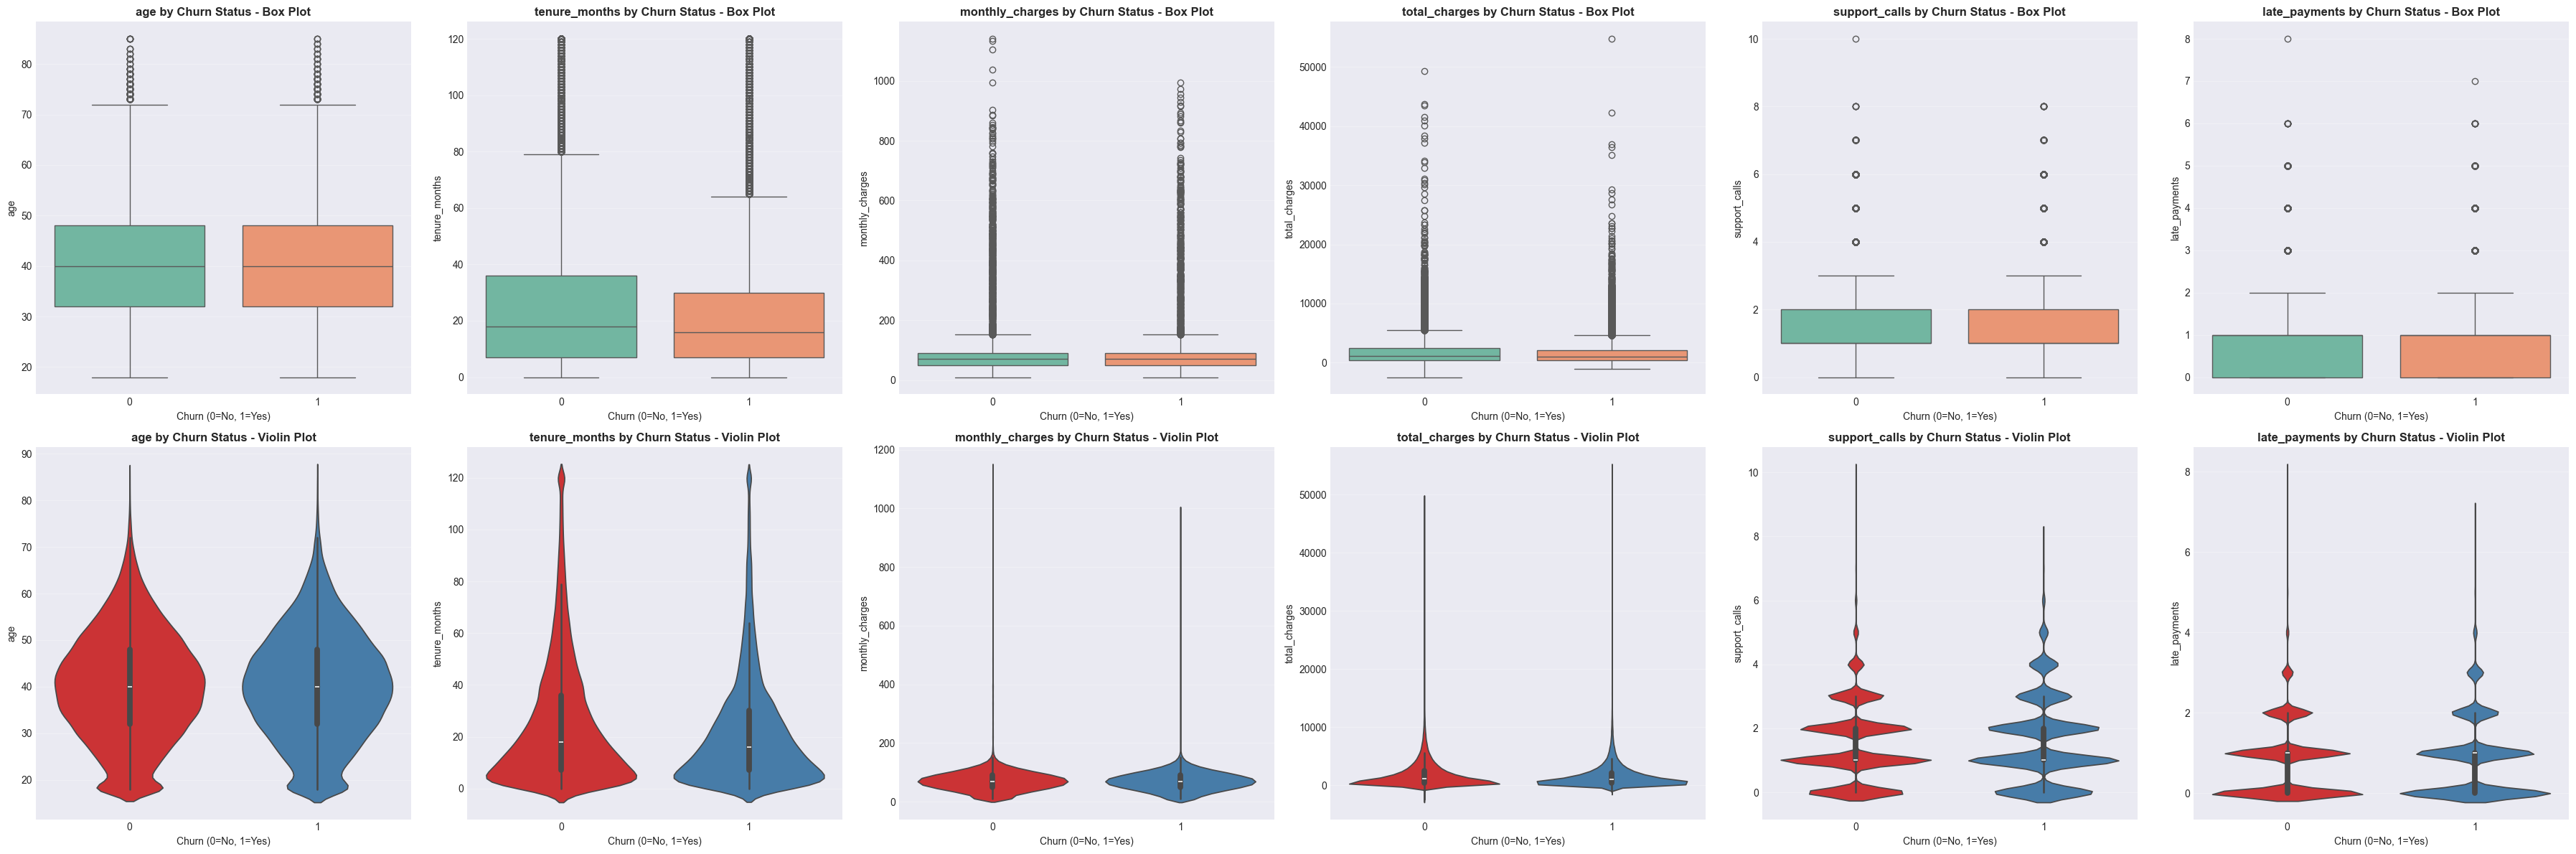

In [26]:
# Box plots: Numerical features by churn status
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(6*len(numerical_cols), 12))

if len(numerical_cols) == 1:
    axes = axes.reshape(-1, 1)

for idx, col in enumerate(numerical_cols):
    # Box plot
    sns.boxplot(data=df, x='churn', y=col, ax=axes[0, idx], palette='Set2')
    axes[0, idx].set_title(f'{col} by Churn Status - Box Plot', fontweight='bold')
    axes[0, idx].set_xlabel('Churn (0=No, 1=Yes)')
    axes[0, idx].set_ylabel(col)
    axes[0, idx].grid(axis='y', alpha=0.3)
    
    # Violin plot
    sns.violinplot(data=df, x='churn', y=col, ax=axes[1, idx], palette='Set1')
    axes[1, idx].set_title(f'{col} by Churn Status - Violin Plot', fontweight='bold')
    axes[1, idx].set_xlabel('Churn (0=No, 1=Yes)')
    axes[1, idx].set_ylabel(col)
    axes[1, idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

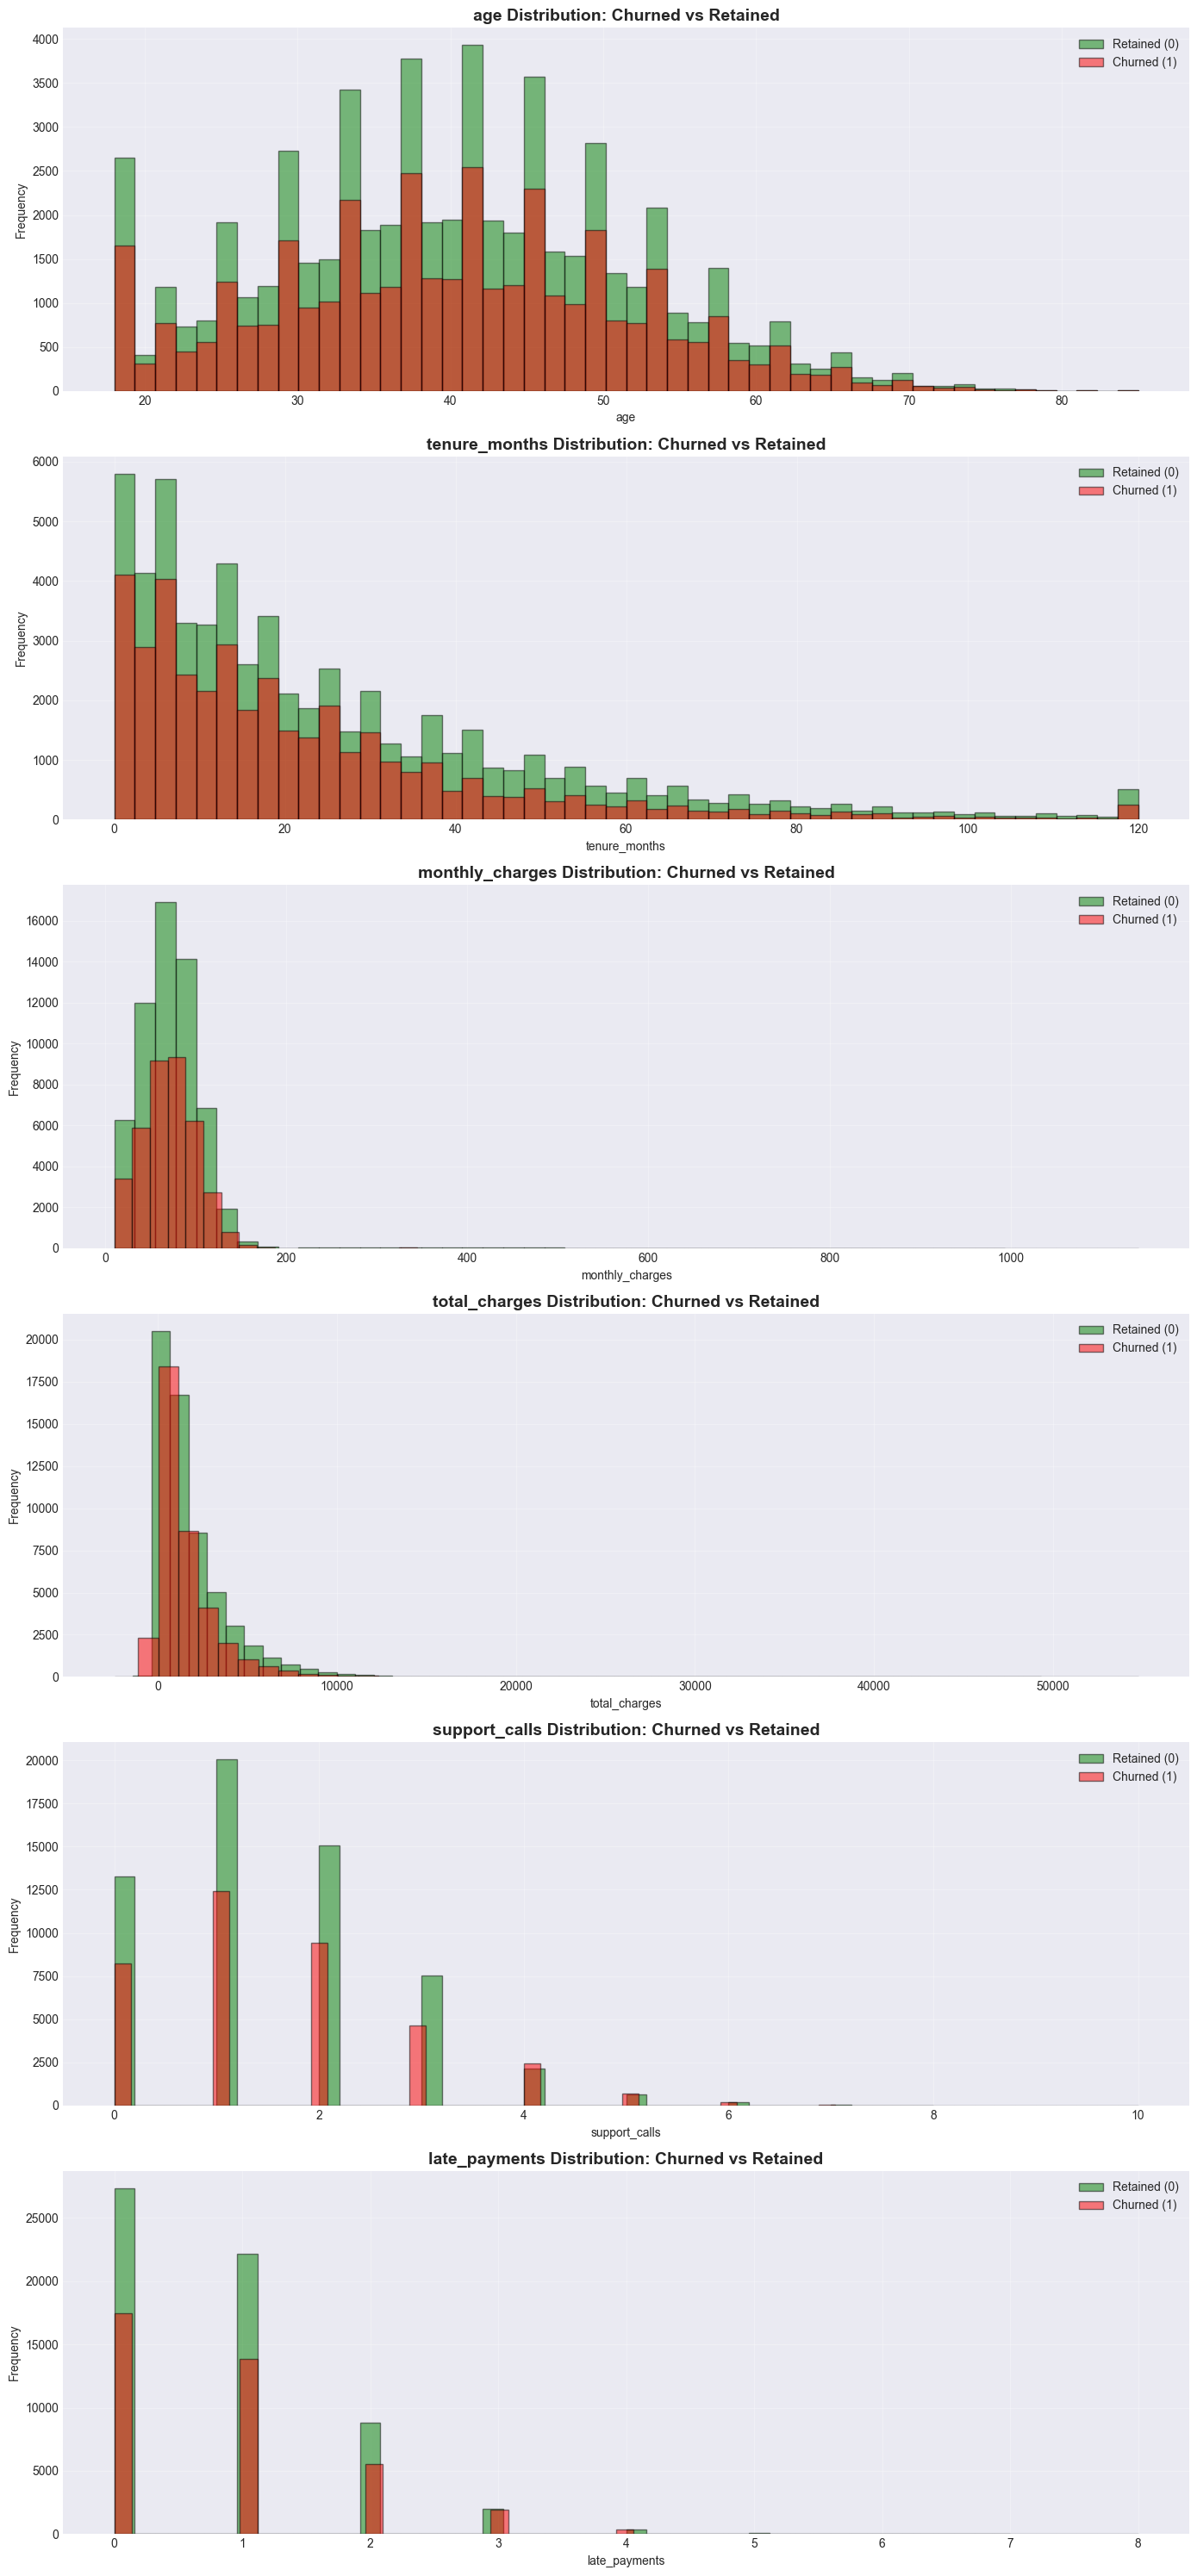

In [27]:
# Distribution comparison: Churned vs Retained
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(14, 5*len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    churned = df[df['churn'] == 1][col].dropna()
    retained = df[df['churn'] == 0][col].dropna()
    
    axes[idx].hist(retained, bins=50, alpha=0.5, label='Retained (0)', color='green', edgecolor='black')
    axes[idx].hist(churned, bins=50, alpha=0.5, label='Churned (1)', color='red', edgecolor='black')
    axes[idx].set_title(f'{col} Distribution: Churned vs Retained', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis - Categorical Features vs Churn

In [28]:
# Categorical features vs Churn - Statistical analysis
print("Categorical Features vs Churn - Chi-Square Test\n")
print("="*80)

for col in categorical_cols:
    print(f"\nFeature: {col.upper()}")
    print("-"*80)
    
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['churn'])
    print("\nContingency Table:")
    print(contingency_table)
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test Results:")
    print(f"  Chi-Square Statistic: {chi2:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Degrees of Freedom: {dof}")
    print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Cramér's V (effect size)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"  Cramér's V: {cramers_v:.3f}")
    
    # Churn rate by category
    churn_rate = df.groupby(col)['churn'].agg(['sum', 'count', 'mean'])
    churn_rate.columns = ['Churned_Count', 'Total_Count', 'Churn_Rate']
    churn_rate['Churn_Rate'] = churn_rate['Churn_Rate'] * 100
    print("\nChurn Rate by Category:")
    print(churn_rate)

Categorical Features vs Churn - Chi-Square Test


Feature: CONTRACT_TYPE
--------------------------------------------------------------------------------

Contingency Table:
churn               0      1
contract_type               
Month-to-month  30482  29537
One year        18942   6123
Two year        11324   3592

Chi-Square Test Results:
  Chi-Square Statistic: 6246.808
  P-value: 0.000000
  Degrees of Freedom: 2
  Significant at α=0.05: Yes
  Cramér's V: 0.250

Churn Rate by Category:
                Churned_Count  Total_Count  Churn_Rate
contract_type                                         
Month-to-month          29537        60019      49.213
One year                 6123        25065      24.428
Two year                 3592        14916      24.082

Feature: INTERNET_SERVICE
--------------------------------------------------------------------------------

Contingency Table:
churn                 0      1
internet_service              
DSL               28238  11486
Fiber op

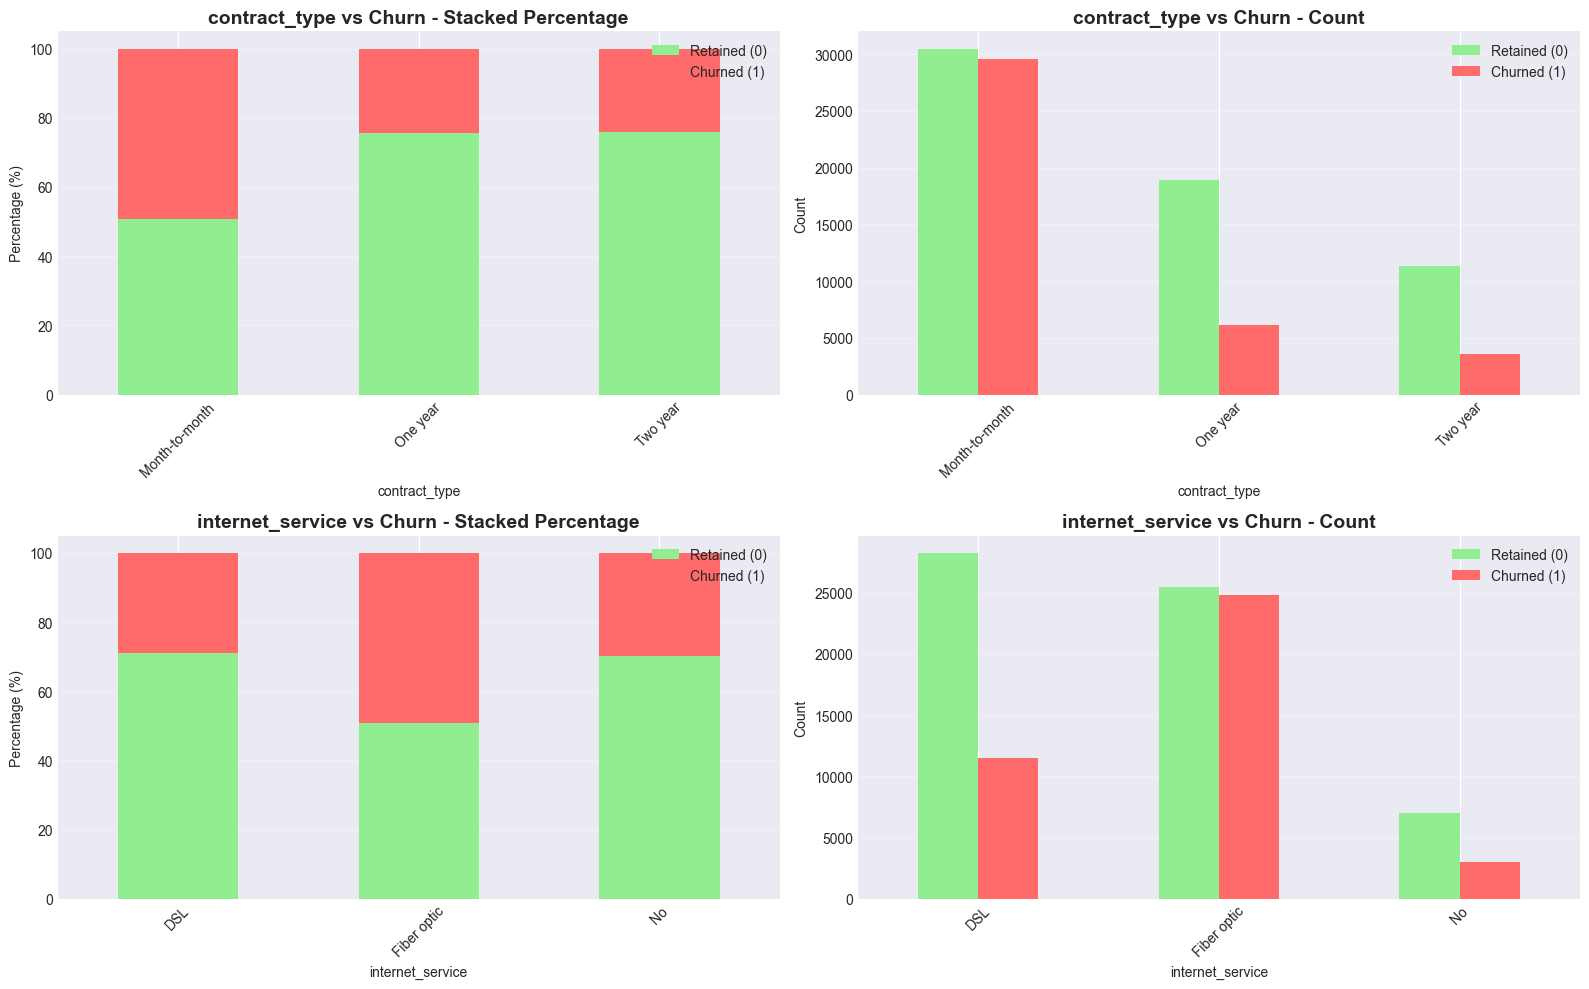

In [29]:
# Visualize categorical features vs churn
fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(categorical_cols):
    # Stacked bar chart
    churn_cross = pd.crosstab(df[col], df['churn'], normalize='index') * 100
    churn_cross.plot(kind='bar', stacked=True, ax=axes[idx, 0], color=['#90EE90', '#FF6B6B'])
    axes[idx, 0].set_title(f'{col} vs Churn - Stacked Percentage', fontsize=14, fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Percentage (%)')
    axes[idx, 0].legend(['Retained (0)', 'Churned (1)'], loc='best')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # Grouped bar chart
    churn_cross_counts = pd.crosstab(df[col], df['churn'])
    churn_cross_counts.plot(kind='bar', ax=axes[idx, 1], color=['#90EE90', '#FF6B6B'])
    axes[idx, 1].set_title(f'{col} vs Churn - Count', fontsize=14, fontweight='bold')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].set_ylabel('Count')
    axes[idx, 1].legend(['Retained (0)', 'Churned (1)'], loc='best')
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

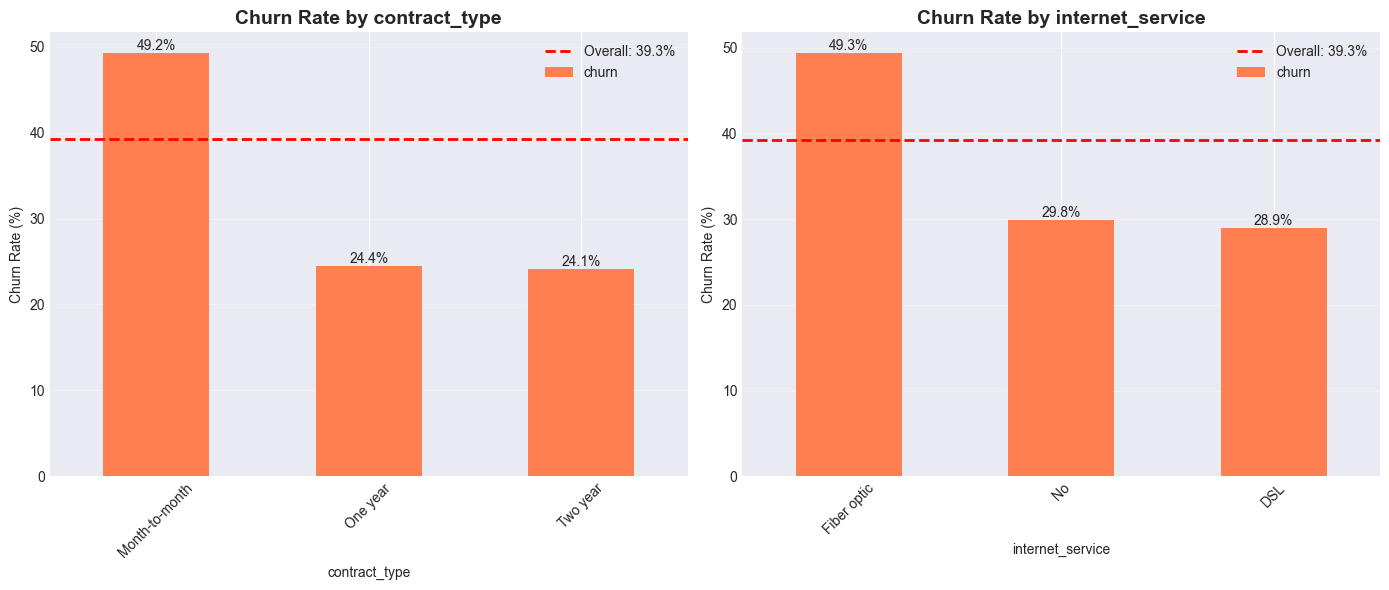

In [30]:
# Churn rate by categorical feature
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(7*len(categorical_cols), 6))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['churn'].mean() * 100
    churn_rate.sort_values(ascending=False).plot(kind='bar', ax=axes[idx], color='coral')
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Churn Rate (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].axhline(df['churn'].mean()*100, color='red', linestyle='--', 
                      linewidth=2, label=f'Overall: {df["churn"].mean()*100:.1f}%')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

In [31]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_cols + ['churn']].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Correlation with target variable
print("\nCorrelation with Churn (sorted by absolute value):")
churn_corr = corr_matrix['churn'].drop('churn').sort_values(key=abs, ascending=False)
print(churn_corr)

Correlation Matrix:
                   age  tenure_months  monthly_charges  total_charges  \
age              1.000         -0.002           -0.001         -0.001   
tenure_months   -0.002          1.000            0.007          0.801   
monthly_charges -0.001          0.007            1.000          0.400   
total_charges   -0.001          0.801            0.400          1.000   
support_calls    0.005          0.002            0.004          0.003   
late_payments   -0.002         -0.001            0.005          0.001   
churn            0.001         -0.070            0.000         -0.057   

                 support_calls  late_payments  churn  
age                      0.005         -0.002  0.001  
tenure_months            0.002         -0.001 -0.070  
monthly_charges          0.004          0.005  0.000  
total_charges            0.003          0.001 -0.057  
support_calls            1.000          0.003  0.046  
late_payments            0.003          1.000  0.025  
churn     

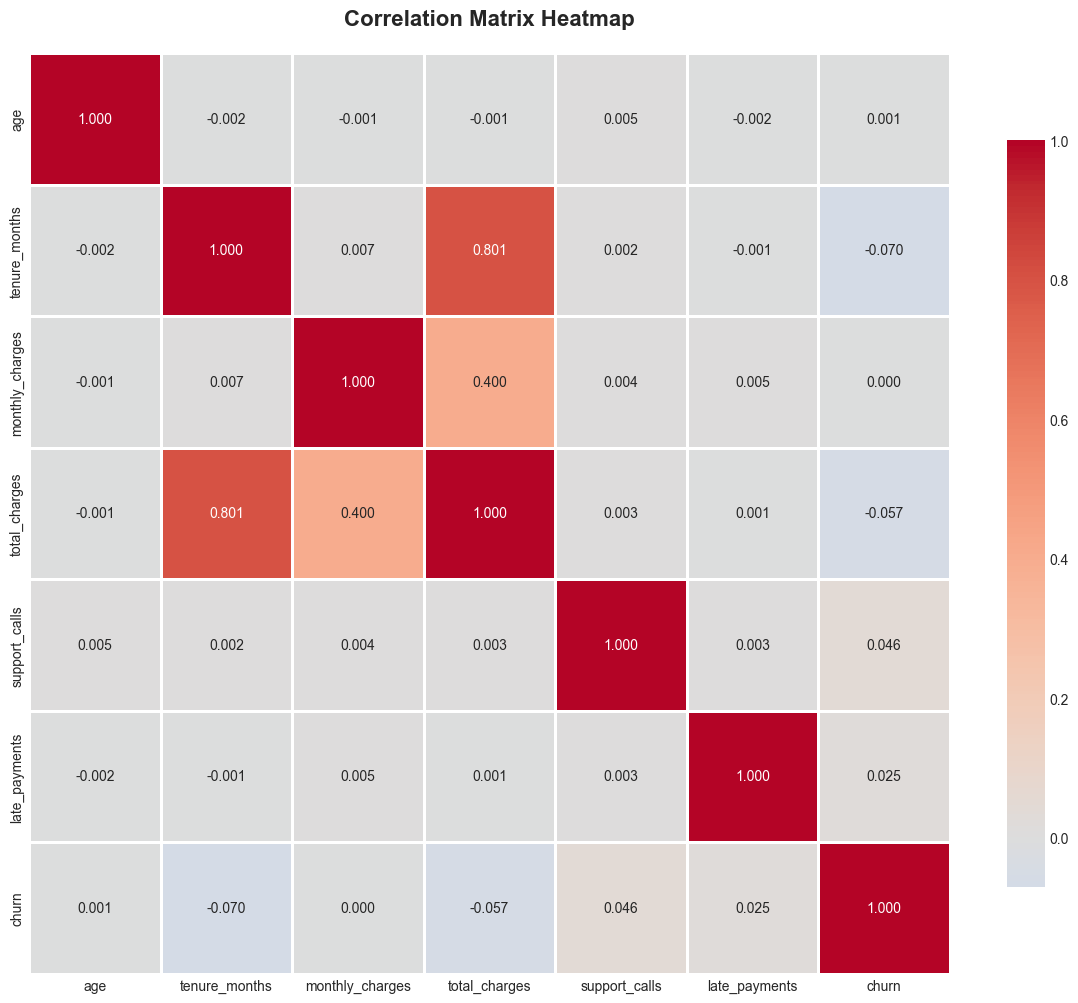

In [32]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

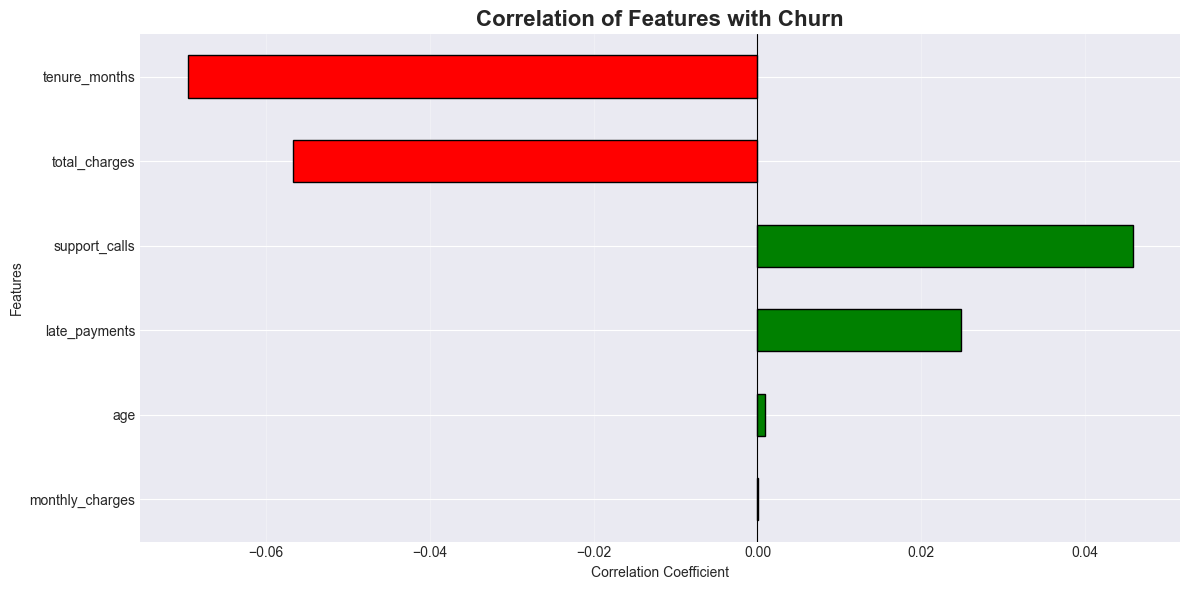

In [33]:
# Correlation with churn - bar plot
plt.figure(figsize=(12, 6))
churn_corr_abs = churn_corr.abs().sort_values(ascending=True)
colors = ['green' if x > 0 else 'red' for x in churn_corr[churn_corr_abs.index]]
churn_corr[churn_corr_abs.index].plot(kind='barh', color=colors, edgecolor='black')
plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Multivariate Analysis

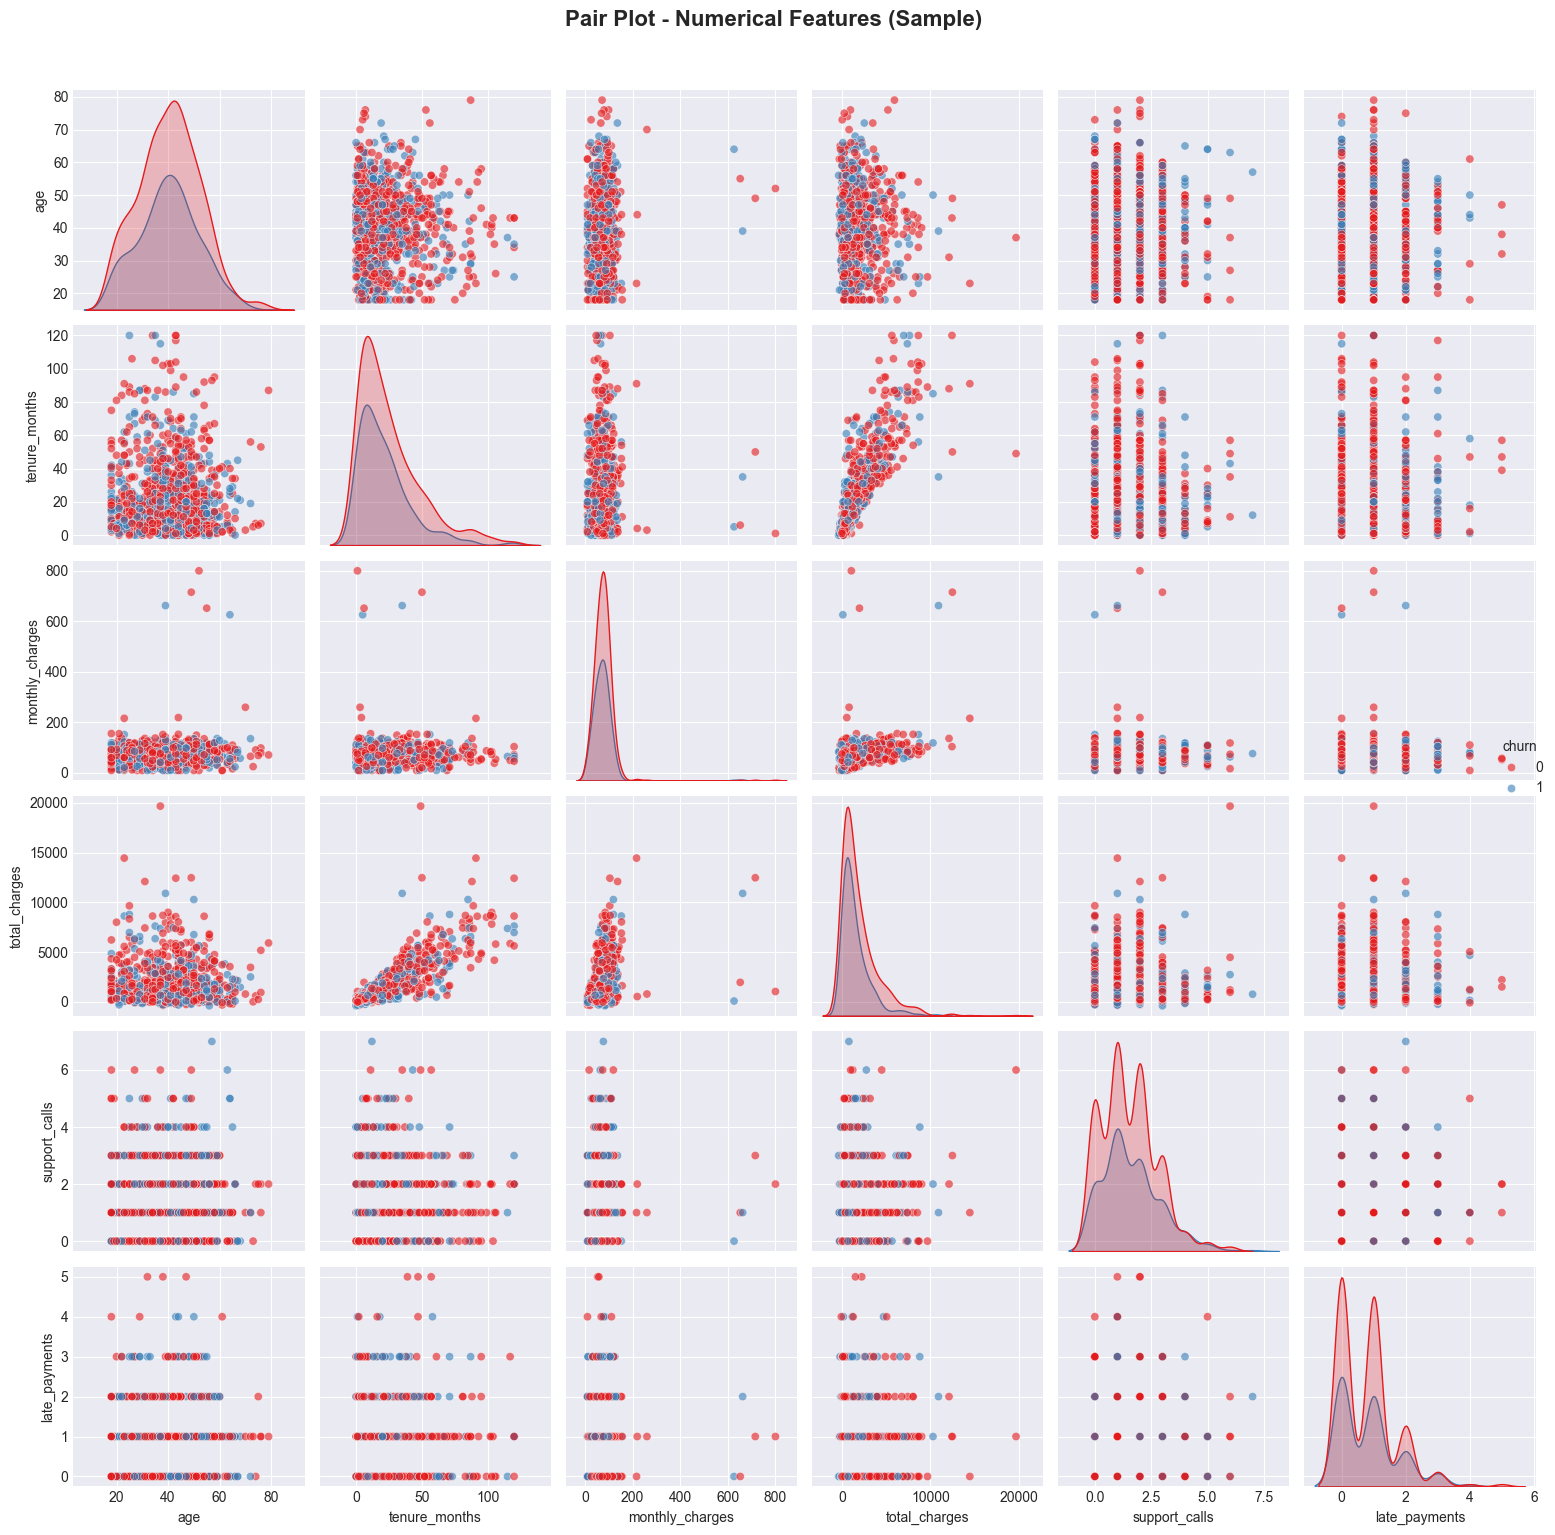

In [34]:
# Pair plot for numerical features (sample for performance)
sample_df = df.sample(n=min(1000, len(df)), random_state=42)
sns.pairplot(sample_df[numerical_cols + ['churn']], hue='churn', palette='Set1', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot - Numerical Features (Sample)', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

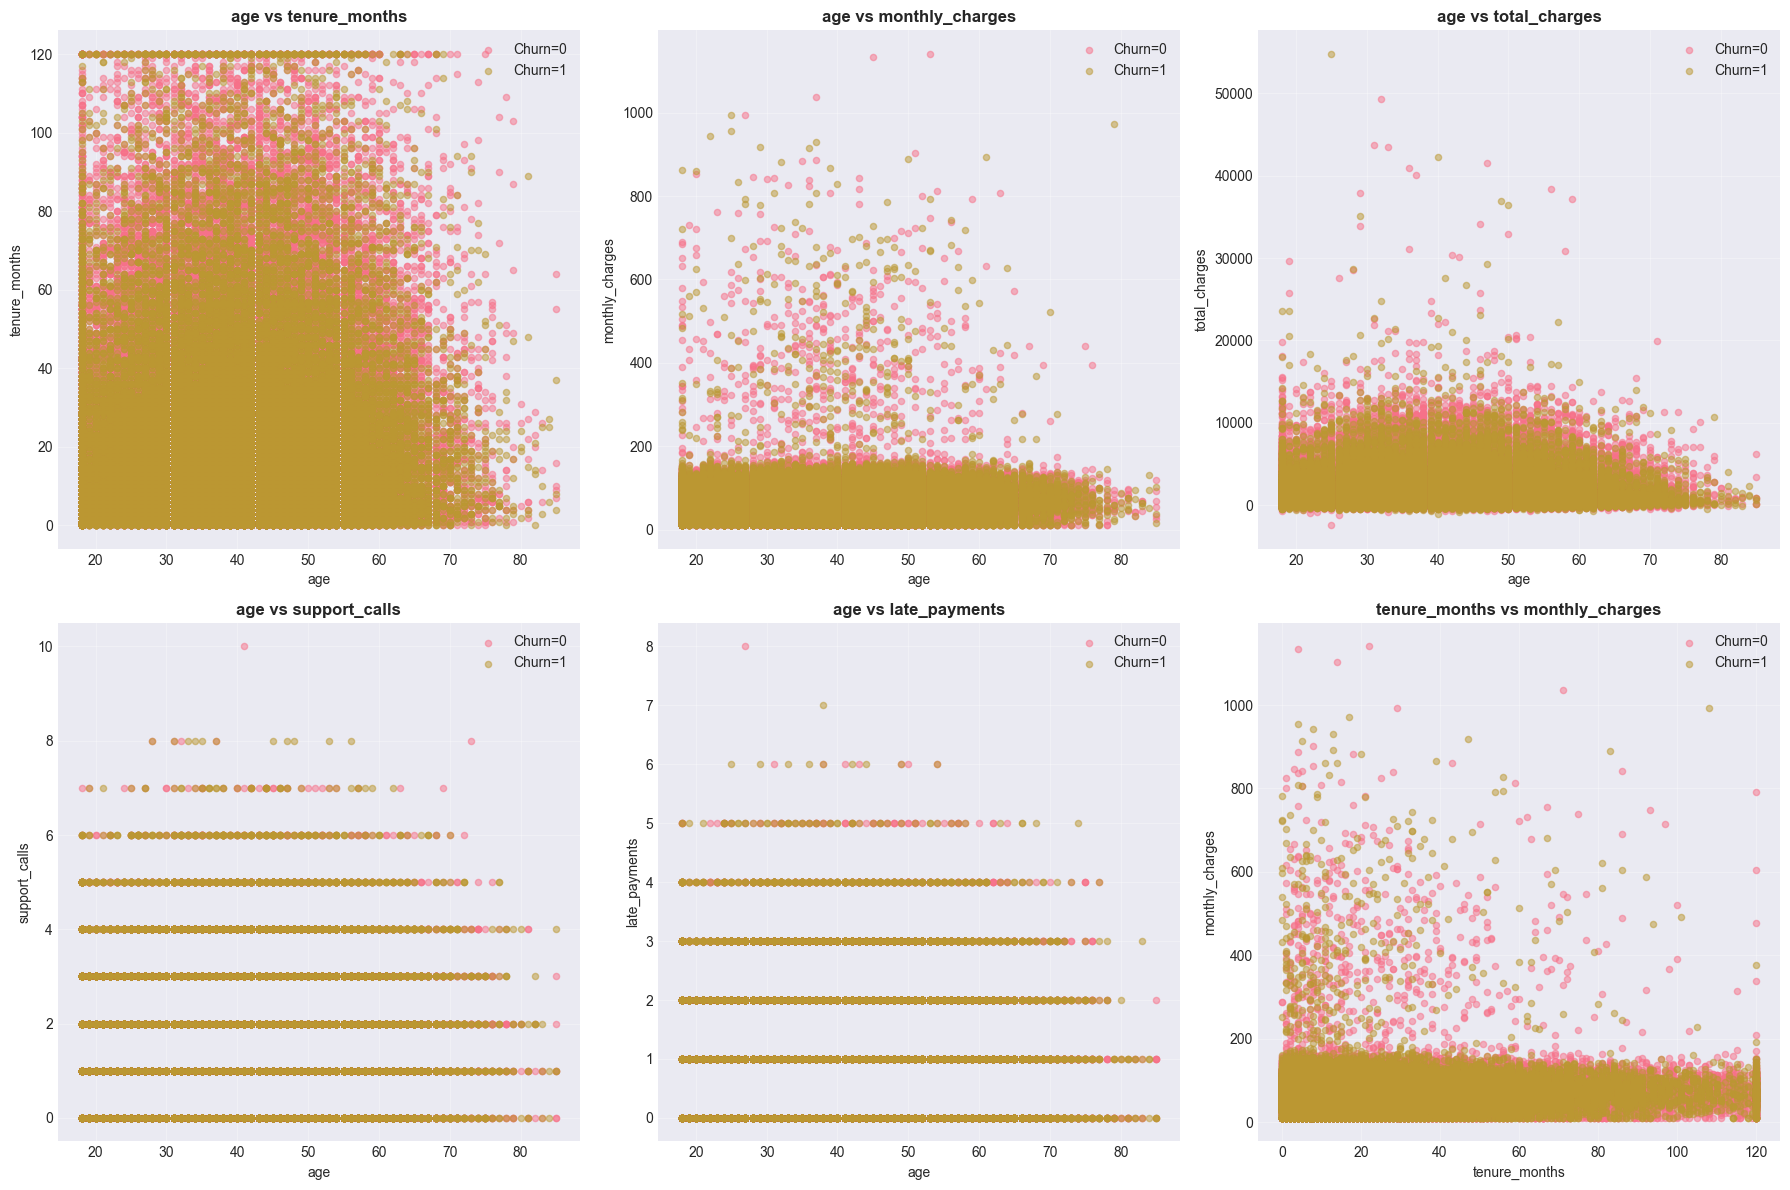

In [35]:
# Scatter plots matrix
if len(numerical_cols) >= 2:
    from itertools import combinations
    
    # Get all pairs of numerical features
    feature_pairs = list(combinations(numerical_cols, 2))
    
    # Limit to first 6 pairs for visualization
    n_pairs = min(6, len(feature_pairs))
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, (feat1, feat2) in enumerate(feature_pairs[:n_pairs]):
        for churn_val in [0, 1]:
            subset = df[df['churn'] == churn_val]
            axes[idx].scatter(subset[feat1], subset[feat2], 
                            label=f'Churn={churn_val}', alpha=0.5, s=20)
        
        axes[idx].set_xlabel(feat1, fontsize=10)
        axes[idx].set_ylabel(feat2, fontsize=10)
        axes[idx].set_title(f'{feat1} vs {feat2}', fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

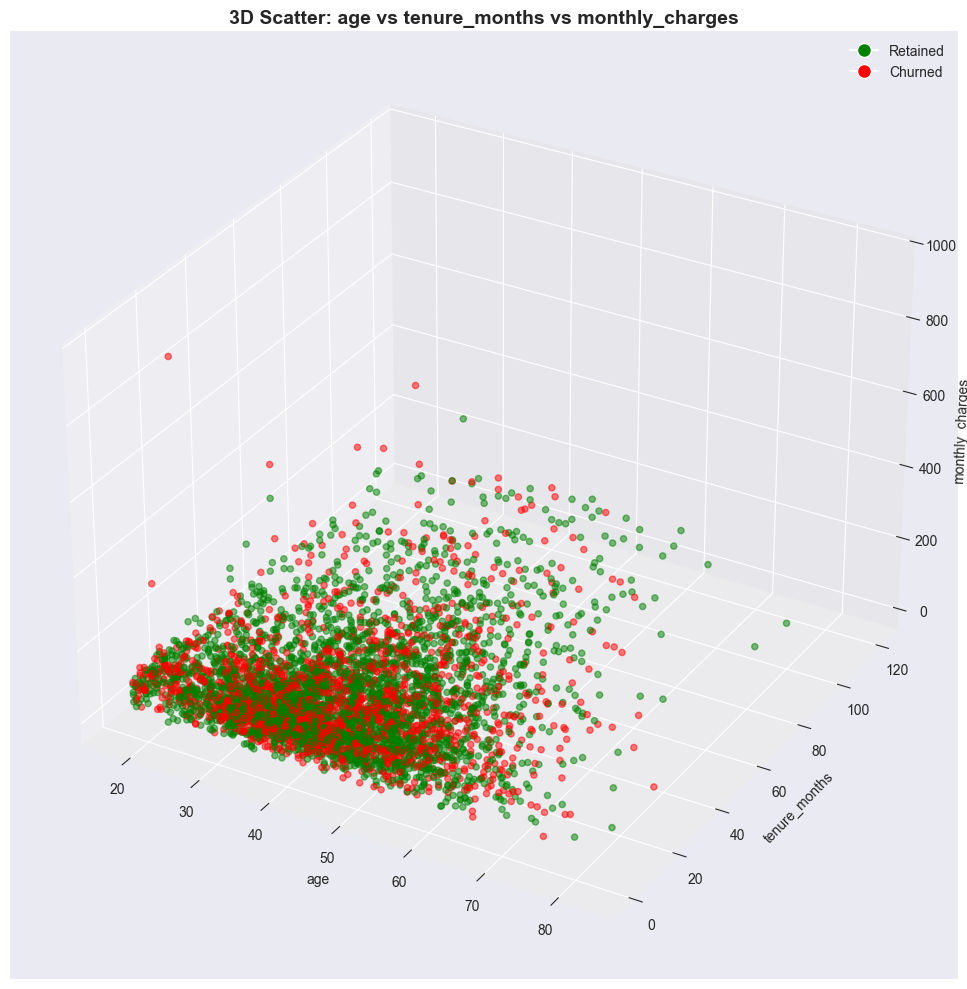

In [36]:
# 3D scatter plot (if we have at least 3 numerical features)
if len(numerical_cols) >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)
    
    colors = ['green' if x == 0 else 'red' for x in sample_df['churn']]
    ax.scatter(sample_df[numerical_cols[0]], 
               sample_df[numerical_cols[1]], 
               sample_df[numerical_cols[2]], 
               c=colors, alpha=0.5, s=20)
    
    ax.set_xlabel(numerical_cols[0], fontsize=10)
    ax.set_ylabel(numerical_cols[1], fontsize=10)
    ax.set_zlabel(numerical_cols[2], fontsize=10)
    ax.set_title(f'3D Scatter: {numerical_cols[0]} vs {numerical_cols[1]} vs {numerical_cols[2]}',
                 fontsize=14, fontweight='bold')
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='green', markersize=10, label='Retained'),
                      Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='red', markersize=10, label='Churned')]
    ax.legend(handles=legend_elements)
    
    plt.tight_layout()
    plt.show()

## 10. Outlier Detection and Analysis

In [37]:
# Outlier detection using IQR method
print("Outlier Detection using IQR Method\n")
print("="*80)

outlier_summary = []

for col in numerical_cols:
    data = df[col].dropna()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\nFeature: {col.upper()}")
    print(f"  Q1: {Q1:.3f}")
    print(f"  Q3: {Q3:.3f}")
    print(f"  IQR: {IQR:.3f}")
    print(f"  Lower Bound: {lower_bound:.3f}")
    print(f"  Upper Bound: {upper_bound:.3f}")
    print(f"  Number of Outliers: {len(outliers):,}")
    print(f"  Percentage of Outliers: {(len(outliers) / len(data) * 100):.2f}%")
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': (len(outliers) / len(data) * 100),
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "="*80)
print("\nOutlier Summary:")
print(outlier_df)

Outlier Detection using IQR Method


Feature: AGE
  Q1: 32.000
  Q3: 48.000
  IQR: 16.000
  Lower Bound: 8.000
  Upper Bound: 72.000
  Number of Outliers: 316
  Percentage of Outliers: 0.33%

Feature: TENURE_MONTHS
  Q1: 7.000
  Q3: 33.000
  IQR: 26.000
  Lower Bound: -32.000
  Upper Bound: 72.000
  Number of Outliers: 5,015
  Percentage of Outliers: 5.01%

Feature: MONTHLY_CHARGES
  Q1: 49.920
  Q3: 90.890
  IQR: 40.970
  Lower Bound: -11.535
  Upper Bound: 152.345
  Number of Outliers: 1,167
  Percentage of Outliers: 1.20%

Feature: TOTAL_CHARGES
  Q1: 411.793
  Q3: 2310.012
  IQR: 1898.220
  Lower Bound: -2435.537
  Upper Bound: 5157.342
  Number of Outliers: 6,217
  Percentage of Outliers: 6.41%

Feature: SUPPORT_CALLS
  Q1: 1.000
  Q3: 2.000
  IQR: 1.000
  Lower Bound: -0.500
  Upper Bound: 3.500
  Number of Outliers: 6,367
  Percentage of Outliers: 6.56%

Feature: LATE_PAYMENTS
  Q1: 0.000
  Q3: 1.000
  IQR: 1.000
  Lower Bound: -1.500
  Upper Bound: 2.500
  Number of Outliers: 4

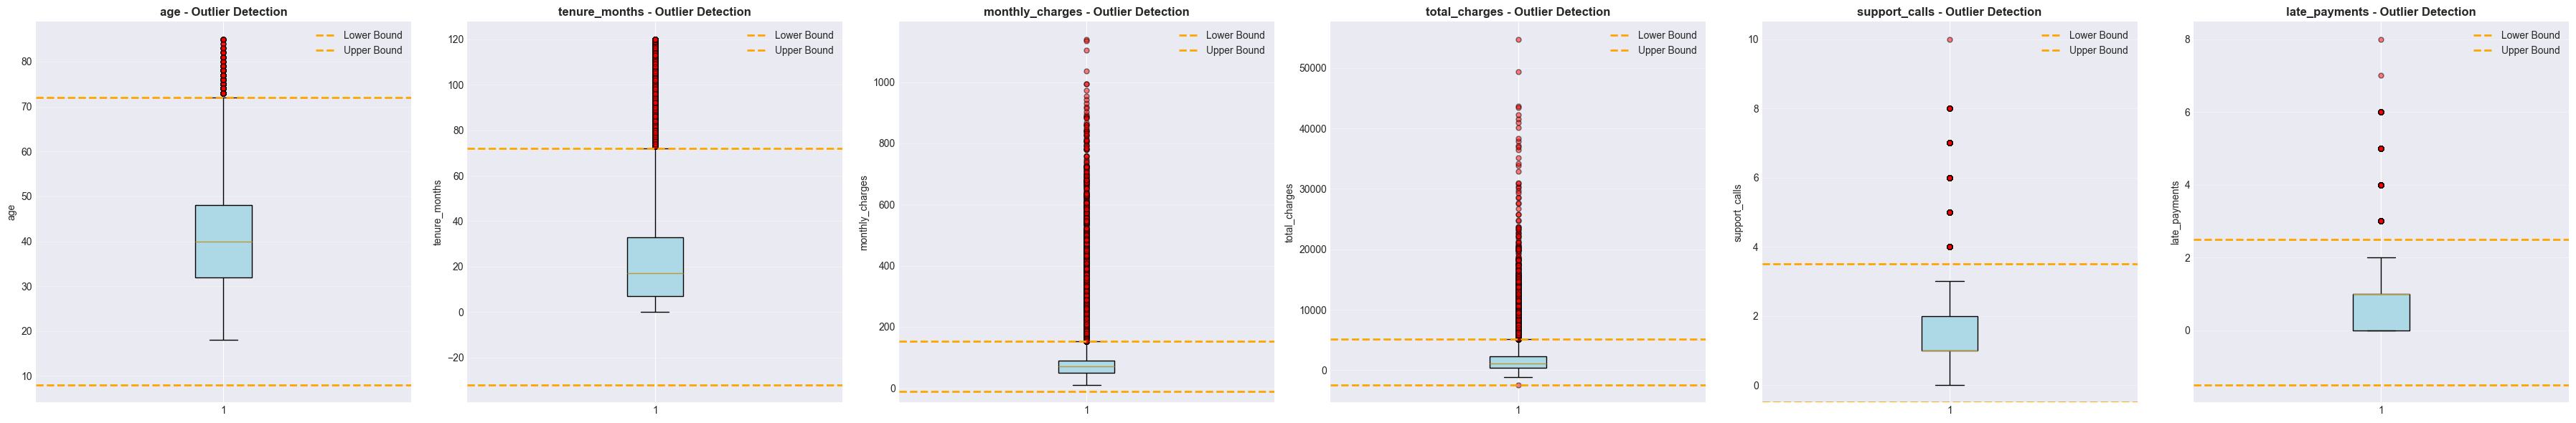

In [38]:
# Visualize outliers
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(6*len(numerical_cols), 6))

if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Box plot with outliers highlighted
    bp = axes[idx].boxplot(data, vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue'),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                         markersize=5, alpha=0.5))
    
    axes[idx].set_title(f'{col} - Outlier Detection', fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].axhline(lower_bound, color='orange', linestyle='--', 
                      linewidth=2, label='Lower Bound')
    axes[idx].axhline(upper_bound, color='orange', linestyle='--', 
                      linewidth=2, label='Upper Bound')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
# Z-score method for outlier detection
print("Outlier Detection using Z-Score Method (|z| > 3)\n")
print("="*80)

for col in numerical_cols:
    data = df[col].dropna()
    z_scores = np.abs(stats.zscore(data))
    outliers = data[z_scores > 3]
    
    print(f"\nFeature: {col.upper()}")
    print(f"  Number of Outliers (|z| > 3): {len(outliers):,}")
    print(f"  Percentage: {(len(outliers) / len(data) * 100):.2f}%")

Outlier Detection using Z-Score Method (|z| > 3)


Feature: AGE
  Number of Outliers (|z| > 3): 142
  Percentage: 0.15%

Feature: TENURE_MONTHS
  Number of Outliers (|z| > 3): 2,049
  Percentage: 2.05%

Feature: MONTHLY_CHARGES
  Number of Outliers (|z| > 3): 786
  Percentage: 0.81%

Feature: TOTAL_CHARGES
  Number of Outliers (|z| > 3): 1,799
  Percentage: 1.85%

Feature: SUPPORT_CALLS
  Number of Outliers (|z| > 3): 474
  Percentage: 0.49%

Feature: LATE_PAYMENTS
  Number of Outliers (|z| > 3): 950
  Percentage: 0.95%


## 11. Normality Tests

In [40]:
# Normality tests for numerical features
print("Normality Tests for Numerical Features\n")
print("="*80)

normality_results = []

for col in numerical_cols:
    data = df[col].dropna()
    
    # Sample for large datasets (Shapiro-Wilk works best with n < 5000)
    if len(data) > 5000:
        sample_data = data.sample(5000, random_state=42)
    else:
        sample_data = data
    
    print(f"\nFeature: {col.upper()}")
    print("-"*80)
    
    # Shapiro-Wilk test
    stat_sw, p_sw = shapiro(sample_data)
    print(f"\nShapiro-Wilk Test:")
    print(f"  Test Statistic: {stat_sw:.6f}")
    print(f"  P-value: {p_sw:.6f}")
    print(f"  Normal at α=0.05: {'Yes' if p_sw > 0.05 else 'No'}")
    
    # Kolmogorov-Smirnov test
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"  Test Statistic: {stat_ks:.6f}")
    print(f"  P-value: {p_ks:.6f}")
    print(f"  Normal at α=0.05: {'Yes' if p_ks > 0.05 else 'No'}")
    
    # D'Agostino's K-squared test
    if len(data) >= 8:  # Minimum sample size for this test
        stat_da, p_da = normaltest(data)
        print(f"\nD'Agostino-Pearson Test:")
        print(f"  Test Statistic: {stat_da:.6f}")
        print(f"  P-value: {p_da:.6f}")
        print(f"  Normal at α=0.05: {'Yes' if p_da > 0.05 else 'No'}")
    
    normality_results.append({
        'Feature': col,
        'Shapiro_Wilk_p': p_sw,
        'KS_Test_p': p_ks,
        'Is_Normal': 'Yes' if (p_sw > 0.05 and p_ks > 0.05) else 'No'
    })

normality_df = pd.DataFrame(normality_results)
print("\n" + "="*80)
print("\nNormality Test Summary:")
print(normality_df)

Normality Tests for Numerical Features


Feature: AGE
--------------------------------------------------------------------------------

Shapiro-Wilk Test:
  Test Statistic: 0.990860
  P-value: 0.000000
  Normal at α=0.05: No

Kolmogorov-Smirnov Test:
  Test Statistic: 0.028738
  P-value: 0.000000
  Normal at α=0.05: No

D'Agostino-Pearson Test:
  Test Statistic: 1013.309337
  P-value: 0.000000
  Normal at α=0.05: No

Feature: TENURE_MONTHS
--------------------------------------------------------------------------------

Shapiro-Wilk Test:
  Test Statistic: 0.836722
  P-value: 0.000000
  Normal at α=0.05: No

Kolmogorov-Smirnov Test:
  Test Statistic: 0.151696
  P-value: 0.000000
  Normal at α=0.05: No

D'Agostino-Pearson Test:
  Test Statistic: 30389.683420
  P-value: 0.000000
  Normal at α=0.05: No

Feature: MONTHLY_CHARGES
--------------------------------------------------------------------------------

Shapiro-Wilk Test:
  Test Statistic: 0.637656
  P-value: 0.000000
  Normal at α=0

## 12. Time Series Analysis (if Date column is meaningful)

In [41]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Churn over time
churn_over_time = df.groupby('Date')['churn'].agg(['sum', 'count', 'mean']).reset_index()
churn_over_time.columns = ['Date', 'Churned_Count', 'Total_Count', 'Churn_Rate']
churn_over_time['Churn_Rate'] = churn_over_time['Churn_Rate'] * 100

print("Churn Over Time - First 10 Days:")
print(churn_over_time.head(10))

Churn Over Time - First 10 Days:
        Date  Churned_Count  Total_Count  Churn_Rate
0 2025-01-01            109          274      39.781
1 2025-01-02             95          274      34.672
2 2025-01-03            113          274      41.241
3 2025-01-04            114          274      41.606
4 2025-01-05            112          274      40.876
5 2025-01-06            109          274      39.781
6 2025-01-07            118          274      43.066
7 2025-01-08            114          274      41.606
8 2025-01-09            108          274      39.416
9 2025-01-10            113          274      41.241


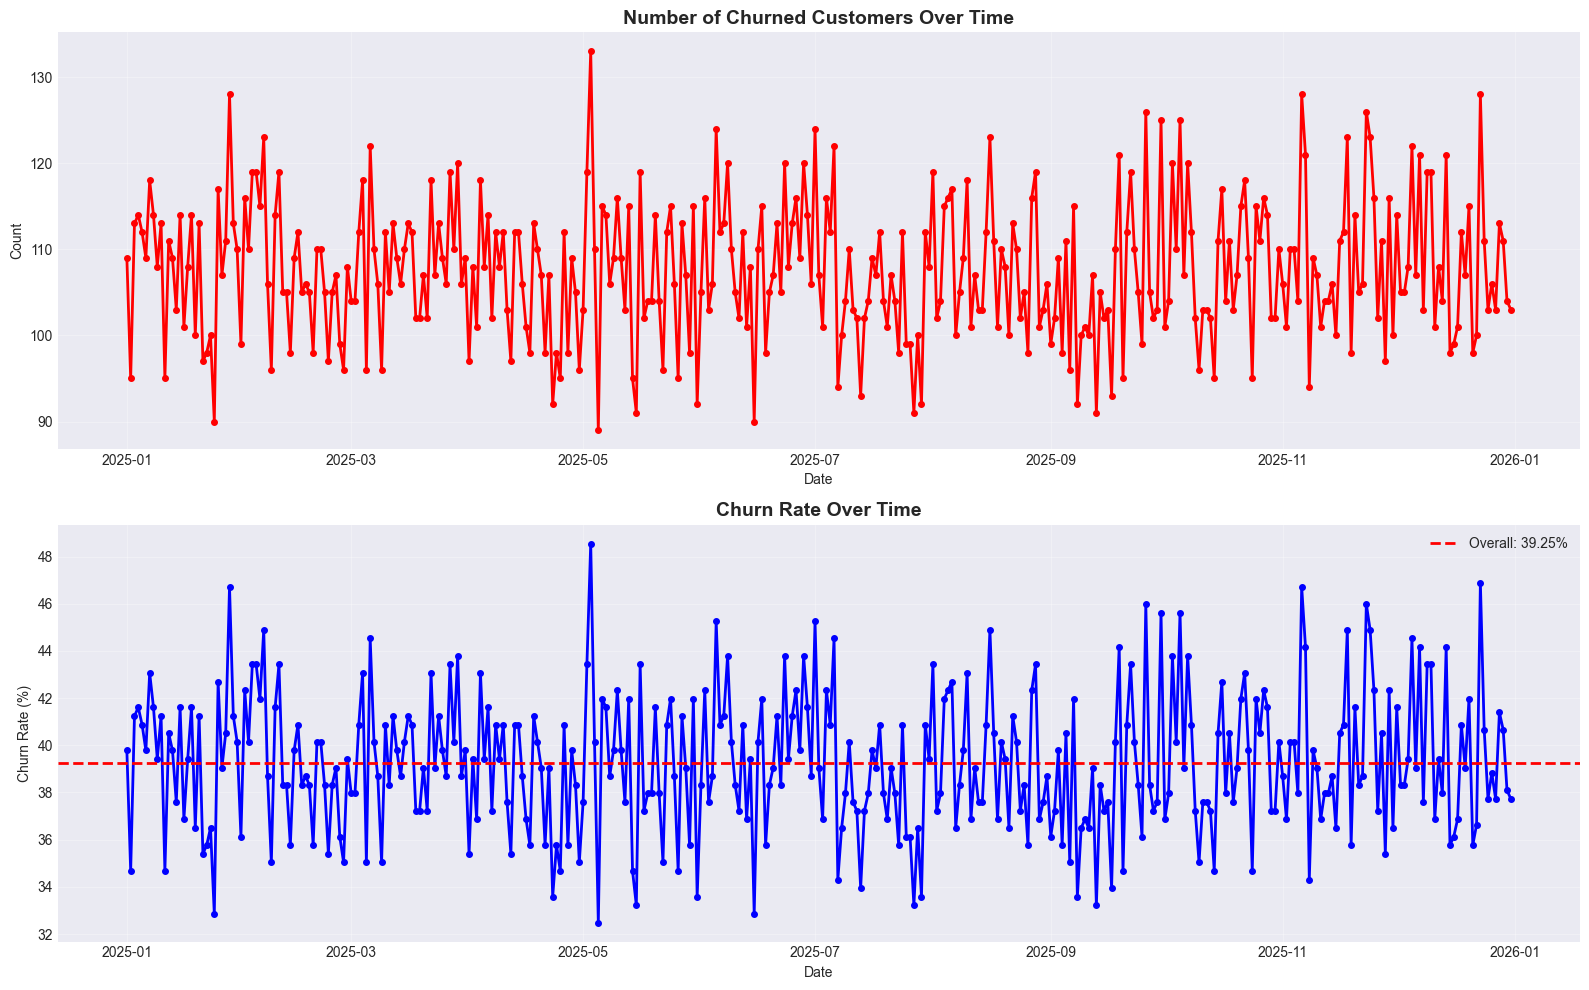

In [42]:
# Plot churn over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Churn count over time
axes[0].plot(churn_over_time['Date'], churn_over_time['Churned_Count'], 
             marker='o', linewidth=2, markersize=4, color='red')
axes[0].set_title('Number of Churned Customers Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].grid(alpha=0.3)

# Churn rate over time
axes[1].plot(churn_over_time['Date'], churn_over_time['Churn_Rate'], 
             marker='o', linewidth=2, markersize=4, color='blue')
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', 
                linewidth=2, label=f'Overall: {df["churn"].mean()*100:.2f}%')
axes[1].set_title('Churn Rate Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Key Insights and Summary

In [43]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total Features: {df.shape[1]}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")

print("\n2. TARGET VARIABLE (CHURN):")
print(f"   - Churn Rate: {df['churn'].mean()*100:.2f}%")
print(f"   - Retention Rate: {(1-df['churn'].mean())*100:.2f}%")
print(f"   - Class Imbalance Ratio: 1:{df['churn'].value_counts()[0]/df['churn'].value_counts()[1]:.2f}")

print("\n3. MISSING VALUES:")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"   - Total Missing Values: {total_missing:,}")
    print(f"   - Features with Missing Values: {(df.isnull().sum() > 0).sum()}")
    print(f"   - Percentage of Data Missing: {(total_missing / (df.shape[0] * df.shape[1]) * 100):.2f}%")
else:
    print("   - No missing values detected")

print("\n4. CORRELATIONS WITH CHURN:")
print("   Top Features (by absolute correlation):")
churn_corr_sorted = corr_matrix['churn'].drop('churn').abs().sort_values(ascending=False)
for i, (feat, corr) in enumerate(churn_corr_sorted.head(5).items(), 1):
    print(f"   {i}. {feat}: {corr:.3f}")

print("\n5. OUTLIERS:")
print("   Features with significant outliers (>5%):")
for _, row in outlier_df[outlier_df['Outlier_Percentage'] > 5].iterrows():
    print(f"   - {row['Feature']}: {row['Outlier_Percentage']:.2f}%")

print("\n6. DISTRIBUTION CHARACTERISTICS:")
for col in numerical_cols:
    skew = df[col].skew()
    print(f"   - {col}: Skewness = {skew:.3f} ({'Right-skewed' if skew > 0.5 else 'Left-skewed' if skew < -0.5 else 'Approximately symmetric'})")

print("\n" + "="*80)
print("END OF EDA")
print("="*80)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total Records: 100,000
   - Total Features: 11
   - Numerical Features: 6
   - Categorical Features: 2

2. TARGET VARIABLE (CHURN):
   - Churn Rate: 39.25%
   - Retention Rate: 60.75%
   - Class Imbalance Ratio: 1:1.55

3. MISSING VALUES:
   - Total Missing Values: 12,000
   - Features with Missing Values: 4
   - Percentage of Data Missing: 1.09%

4. CORRELATIONS WITH CHURN:
   Top Features (by absolute correlation):
   1. tenure_months: 0.070
   2. total_charges: 0.057
   3. support_calls: 0.046
   4. late_payments: 0.025
   5. age: 0.001

5. OUTLIERS:
   Features with significant outliers (>5%):
   - tenure_months: 5.01%
   - total_charges: 6.41%
   - support_calls: 6.56%

6. DISTRIBUTION CHARACTERISTICS:
   - age: Skewness = 0.168 (Approximately symmetric)
   - tenure_months: Skewness = 1.651 (Right-skewed)
   - monthly_charges: Skewness = 6.858 (Right-skewed)
   - total_charges: Skewness = 3.661 (Right-skewed)
 